# Introduction
In this notebook, I try to leverage the reviews data from dataset provided on 'The Wine Land', an online wine shop, and draw actionable insights from it.

##  Objective : 
To build a predictive model for predicting the wine 'variety'.

## Roadmap
The machine Learning workflow is as follows:
1. Data Reading and preprocessing
2. Exploratory Data Analysis
3. Feature Selection and Engineering
4. Set performance metric and compare several models
5. Evaluate best model on test dataset
6. Draw conclusions and write a well documented report.

## Task
It is a supervised classification tesk. Our goal is to predict the class/ variety of wine given a set of features.

Hence, a multi-class classification task.


In [1]:
# Import necessary libraries
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set display options
pd.set_option('display.max_columns',30)
sns.set_style('ticks')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.style.use('ggplot')

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Reading Data

In [2]:
import os
os.getcwd()

'/Users/kavyaannapareddy/Desktop/Projects/Knight_assignment'

In [3]:
file_path_train= '/Users/kavyaannapareddy/Desktop/Projects/Knight_assignment/train.csv'
file_path_test= '/Users/kavyaannapareddy/Desktop/Projects/Knight_assignment/test.csv'

In [4]:
train= pd.read_csv(file_path_train)
train.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [5]:
test= pd.read_csv(file_path_test)
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


The Data Description is as follows:

•	user_name - user_name of the reviewer

•	country -The country that the wine is from.

•	review_title - The title of the wine review, which often contains the vintage.

•	review_description - A verbose review of the wine.

•	designation - The vineyard within the winery where the grapes that made the wine are from.

•	points - ratings given by the user. The ratings are between 0 -100.

•	price - The cost for a bottle of the wine

•	province - The province or state that the wine is from.

•	region_1 - The wine-growing area in a province or state (ie Napa).

•	region_2 - Sometimes there are more specific regions specified within a wine-growing 
area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank.

•	winery - The winery that made the wine

•	variety - The type of grapes used to make the wine. Dependent variable for task 2 of the assignment


In [6]:
train.shape

(82657, 12)

Our training dataset has 82,657 rows and 12 features of which 'variety' is our target feature.


In [7]:
test.shape

(20665, 11)

Our test dataset has 20,665 rows and 11 features.

## Missing Values

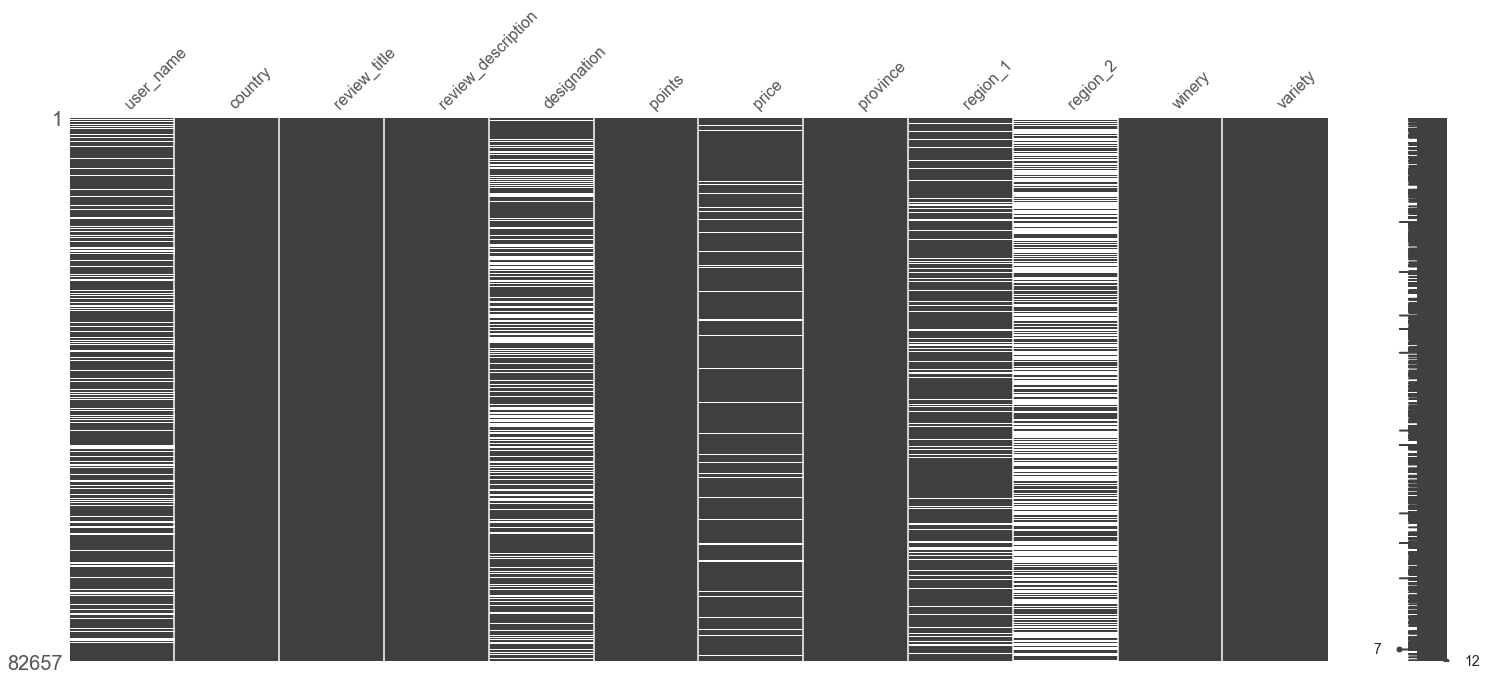

In [8]:
import missingno as mn
mn.matrix(train)

We have five columns with missing data with highest values of missing values in region_2 followed by designation. Let's see the percentages of missing values and decide whether to impute or ignore those rows with missing values.

In [9]:
# Create a function to calculate Missing values table
def missing_value(df):
  # missing values by column
  missing_val= df.isnull().sum()
  # % of missing values
  missing_val_percent = missing_val * 100/ len(df)
  # creating a table with values and percentage amounts
  missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
  missing_val_table_rename= missing_val_table.rename(columns= {0:'missing values count', 1:'% of missing values'})
  missing_val_table_rename_sort= missing_val_table_rename[missing_val_table_rename.iloc[:,0]!=0].sort_values(by='missing values count', ascending=False).round(1)
  print('Your dataframe has {} columns of which {} contain missing values'.format(df.shape[1], len(missing_val_table_rename_sort)))


  return missing_val_table_rename_sort


In [10]:
missing_value(train)

Your dataframe has 12 columns of which 7 contain missing values


,missing values count,% of missing values
region_2,46708,56.5
designation,23647,28.6
user_name,19393,23.5
region_1,12754,15.4
price,5569,6.7
country,35,0.0
province,35,0.0


More than 50% of data in region_2 is missing. However, from our dataset description, we know that this field can sometimes be blank. 

The next variable with high number of missing values is designation. 

In [11]:
missing_value(test)

Your dataframe has 11 columns of which 7 contain missing values


,missing values count,% of missing values
region_2,11751,56.9
designation,5989,29.0
user_name,4738,22.9
region_1,3314,16.0
price,1394,6.7
country,4,0.0
province,4,0.0


# Exploratory Data Analysis

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


## Target Variable
Let's look at our target variable variety to check the unique values it consists of.

In [13]:
train['variety'].nunique()

28

Text(0.5, 0.98, 'Wine Varieties and their counts')

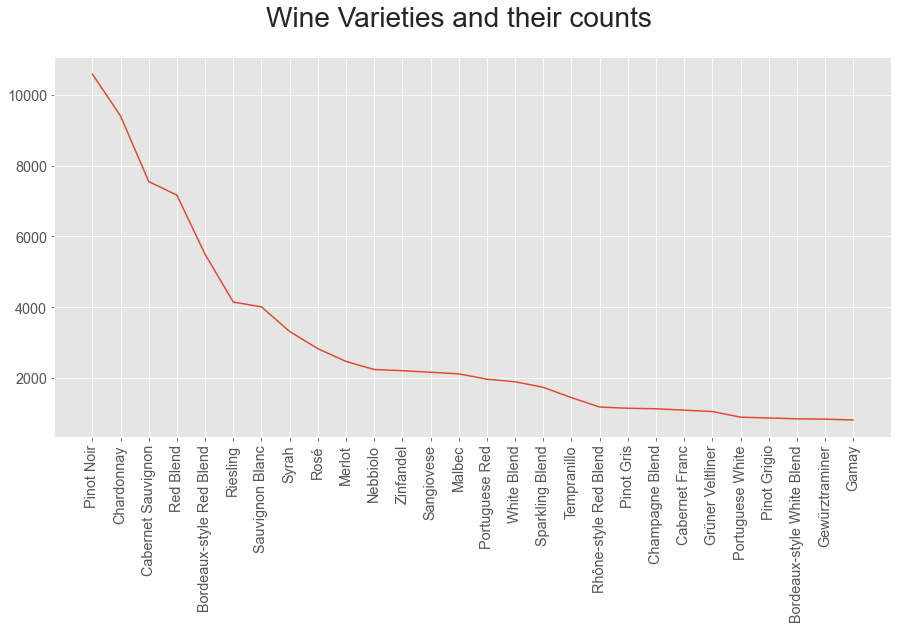

In [14]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.plot(train['variety'].value_counts())
plt.suptitle('Wine Varieties and their counts', fontsize=28)

We notice that there are 28 unique classes in our target feature and they are not equally distibuted. Hence, we need to ensure that our sampling takes care of the imbalanced dataset.

The top two varieties Pinot Noir and Chardonnay make up close to 25% of total and top5 close to 50%. 

## Categorical Features

In [15]:
train['country'].value_counts().head()

US          38573
France      15948
Italy        9112
Portugal     3197
Chile        2891
Name: country, dtype: int64

In [16]:
# Create a function to calculate value counts and their percentages table
def count_value(df):
  # missing values by column
  val= df.value_counts()
  # % of missing values
  val_percent = val * 100/ len(df)
  # creating a table with values and percentage amounts
  val_table = pd.concat([val, val_percent], axis=1)
  val_table.columns= ['count','count%']  
  val_table_sort= val_table[val_table.iloc[:,0]!=0].sort_values(by='count', ascending=False).round(1)
    
  return val_table_sort

In [17]:
count_value(train['country']).head(10)

,count,count%
US,38573,46.7
France,15948,19.3
Italy,9112,11.0
Portugal,3197,3.9
Chile,2891,3.5
Spain,2755,3.3
Argentina,2570,3.1
Austria,1892,2.3
Germany,1573,1.9
New Zealand,1121,1.4


US is the most popular country in our datset followed by France and Italy. Together, they make up 77% of the total. I presume that 'The Wine Land' is established in the US primarily caters to the US consumers.

In [18]:
count_value(train['province']).head(10)

,count,count%
California,25736,31.1
Washington,6060,7.3
Bordeaux,4690,5.7
Oregon,3900,4.7
Tuscany,3780,4.6
Burgundy,3179,3.8
Mendoza Province,2287,2.8
Piedmont,2226,2.7
New York,1978,2.4
Alsace,1664,2.0


We already noted that mojority of the wine in our dataset is from US. Within US, California state accounts for 31% of the total wine production.

In [19]:
train.groupby(['variety','province']).count()['price'].sort_values(ascending= False).head(15)

variety                   province  
Pinot Noir                California    5497
Cabernet Sauvignon        California    4506
Chardonnay                California    4094
Bordeaux-style Red Blend  Bordeaux      2432
Pinot Noir                Oregon        2197
Zinfandel                 California    2143
Nebbiolo                  Piedmont      1771
Red Blend                 Tuscany       1552
Syrah                     California    1512
Sangiovese                Tuscany       1464
Sauvignon Blanc           California    1461
Red Blend                 California    1452
Chardonnay                Burgundy      1449
Merlot                    California    1118
Cabernet Sauvignon        Washington    1095
Name: price, dtype: int64

In [20]:
train.groupby(['variety','region_1']).count()['price'].sort_values(ascending= False).head(15)

variety             region_1              
Cabernet Sauvignon  Napa Valley               1396
Pinot Noir          Russian River Valley      1146
                    Willamette Valley         1143
Nebbiolo            Barolo                    1105
Champagne Blend     Champagne                  845
Pinot Noir          Sonoma Coast               785
Malbec              Mendoza                    746
Chardonnay          Russian River Valley       687
Sangiovese          Brunello di Montalcino     569
Pinot Noir          Sta. Rita Hills            521
Cabernet Sauvignon  Columbia Valley (WA)       506
Nebbiolo            Barbaresco                 501
Riesling            Alsace                     501
Tempranillo         Rioja                      498
Rosé                Côtes de Provence          493
Name: price, dtype: int64

In [21]:
train.groupby(['variety','winery','country']).count()['price'].sort_values(ascending= False).head(15)

variety          winery                country 
Pinot Noir       Williams Selyem       US          116
                 Testarossa            US          100
                 Siduri                US           99
Gamay            Georges Duboeuf       France       82
Riesling         Dr. Loosen            Germany      79
Pinot Noir       Louis Latour          France       76
Chardonnay       Louis Latour          France       70
Portuguese Red   DFJ Vinhos            Portugal     68
Chardonnay       Testarossa            US           65
Portuguese Red   Wines & Winemakers    Portugal     63
Riesling         Dr. Pauly Bergweiler  Germany      59
Chardonnay       La Chablisienne       France       58
Riesling         Maximin Grünhäuser    Germany      56
Pinot Noir       Calera                US           56
Sparkling Blend  Schramsberg           US           56
Name: price, dtype: int64

In [22]:
"""from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode('Louis Latour')
print((location.latitude, location.longitude))
print(location)"""
    

"from geopy.geocoders import Nominatim\ngeolocator = Nominatim()\nlocation = geolocator.geocode('Louis Latour')\nprint((location.latitude, location.longitude))\nprint(location)"

#### 1. Wine variety and Location
#### Insight:

Each region is famous for a specific variety of wine. For example, Napa Valley in California got lot of reviews on Cabernet Sauvignon. Likewise, Tuscany is famous for its Red Blend and Sangiovese varieties. We also obtain a list of wineries with most reviews for  a variety of wine.

#### Action:

The location of the wineries can be geocoded and shown on a map for the browsers online to see from where their wine is coming from. And the distance to the nearest winery, if they wish to visit one. 



In [23]:
count_value(train['user_name'])

,count,count%
@vossroger,17539,21.2
@wineschach,8320,10.1
@vboone,6908,8.4
@paulgwine,6824,8.3
@kerinokeefe,5675,6.9
@mattkettmann,4298,5.2
@wawinereport,3471,4.2
@JoeCz,3054,3.7
@gordone_cellars,2768,3.3
@AnneInVino,2314,2.8


It is very interesting to note that majority of the reviews were written by a handful of users. They could be wine enthusiasts who are probably considered as influencers in this field.

In [24]:
train.groupby(['user_name','variety']).count()['points'].sort_values(ascending= False).head(20)

user_name      variety                 
@vossroger     Bordeaux-style Red Blend    3743
               Chardonnay                  2253
@paulgwine     Pinot Noir                  2157
@kerinokeefe   Red Blend                   1973
@vossroger     Portuguese Red              1966
@kerinokeefe   Nebbiolo                    1534
@vboone        Pinot Noir                  1524
@vossroger     Pinot Noir                  1509
@vboone        Cabernet Sauvignon          1443
@vossroger     Rosé                        1427
@wineschach    Malbec                      1309
@kerinokeefe   Sangiovese                  1259
@mattkettmann  Pinot Noir                  1258
@wineschach    Red Blend                   1200
@vboone        Chardonnay                  1158
@wineschach    Tempranillo                 1157
               Cabernet Sauvignon          1099
@vossroger     Champagne Blend              957
               Portuguese White             896
               Gamay                        811


In [25]:
train.groupby(['user_name'])['variety'].unique()

user_name
@AnneInVino         [Grüner Veltliner, Pinot Noir, Chardonnay, Pin...
@JoeCz              [Chardonnay, Syrah, Pinot Gris, Sparkling Blen...
@bkfiona            [Cabernet Franc, Cabernet Sauvignon, Malbec, S...
@gordone_cellars    [Red Blend, Chardonnay, Merlot, Zinfandel, Cab...
@kerinokeefe        [Red Blend, Nebbiolo, Sangiovese, White Blend,...
@laurbuzz           [Sauvignon Blanc, Syrah, Red Blend, Rosé, Whit...
@mattkettmann       [Sauvignon Blanc, Cabernet Franc, Rhône-style ...
@paulgwine          [Pinot Noir, Chardonnay, Cabernet Sauvignon, S...
@suskostrzewa       [White Blend, Red Blend, Pinot Grigio, Chardon...
@vboone             [Zinfandel, Sauvignon Blanc, Cabernet Sauvigno...
@vossroger          [Bordeaux-style White Blend, Malbec, Gamay, Bo...
@wawinereport       [Red Blend, Sangiovese, Syrah, Cabernet Sauvig...
@wineschach         [Cabernet Sauvignon, Red Blend, Chardonnay, Ma...
@winewchristina     [Chardonnay, Sauvignon Blanc, Sparkling Blend,...
@worldwine

#### 2. User name and wine variety reviewed
#### Insight :
We observe that each user reviews certain varieties of wine. The most popular user_name @vossroger reviewed mostly Bordeaux-style Red Blend followed by Chardonnay,Portuguese Red  and others. Whereas users such as @vboone reviewed  about  specific varieties of wine such as Zinfandel, Sauvignon Blanc,Cabernet Sauvignon, etc

#### Action :
Since each of the wine opinion leaders cater to the interests of that specific customer demographic, this data could be used to suggest influencers for social media following to customers who visit The Wine Land. 

#### Action :
These wine experts can be targeted by wineries and vineyards for marketing purposes. 

## Numerical Variables

Text(0.5, 0.98, 'Distribution of points')

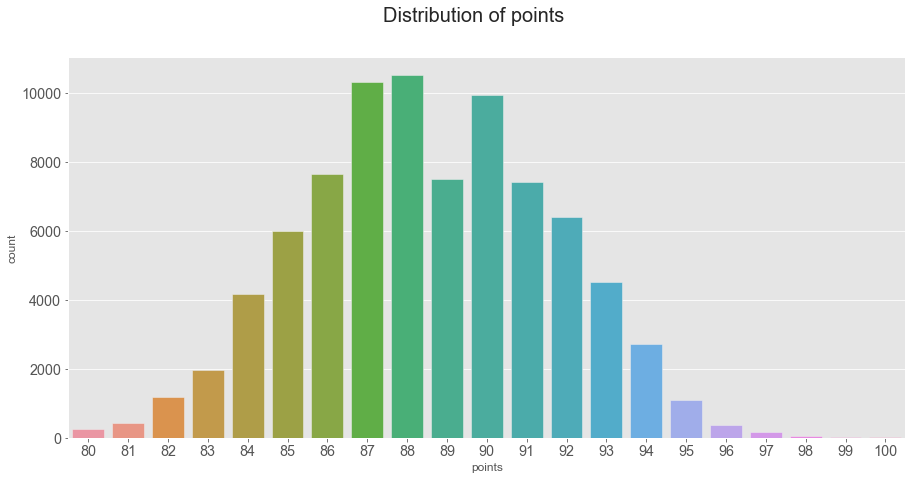

In [82]:
plt.figure(figsize=(15,7))
sns.countplot(train['points'])
plt.suptitle('Distribution of points', fontsize=20)

We observe that the minimum number of points given by the user is 80. We can group the ratings into 4 categories, each with range of 5 points. We obtain 4 inclusive ranges as follows :
1. 79-84
2. 85-89
3. 90-94
4. 95-100


Scores indicate a general quality of wine. Following is a chart taken from Wine Spectator

95-100 — Classic: Great wines

90-94 — Outstanding: Wines of superior character and style

85-89 — Very good: Wines with special qualities

80-84 — Good: Solid, well-made wines

Source:https://www.winespectator.com/articles/about-our-vintage-charts

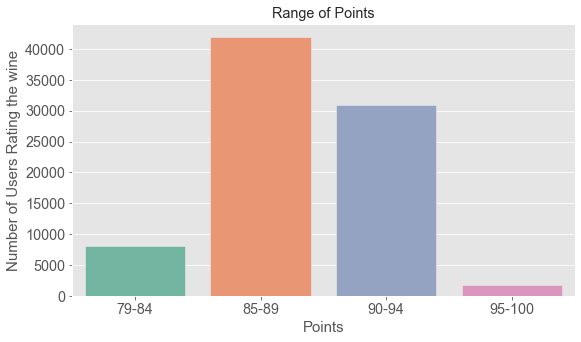

In [27]:
df= train
var= 'points'
b_5 = df[var][(df[var] >= 79) & (df[var] <= 84)]
b_10 = df[var][(df[var] >= 85) & (df[var] <= 89)]
b_15 = df[var][(df[var] >= 90) & (df[var] <= 94)]
b_20 = df[var][(df[var] >= 95) & (df[var] <= 100)]


bx = ["79-84", "85-89", "90-94", "95-100"]
by = [len(b_5.values), len(b_10.values), len(b_15.values), len(b_20.values)]

plt.figure(figsize=(9,5))
sns.barplot(x=bx, y=by, palette="Set2")
plt.title("Range of Points")
plt.xlabel("Points", fontsize= 15)
plt.ylabel("Number of Users Rating the wine", fontsize= 15)
plt.show()

#### 3. Review points of various wines
#### Insight:

We spot that the points range from 80-100 with most wines lying in the range 85-89 followed by 90-94.

#### Action:
We could build a recommender system based on the points by suggesting wines within the same  point range and enhance customer buying choice. Apart from price, points can act as information for customer decision making. 

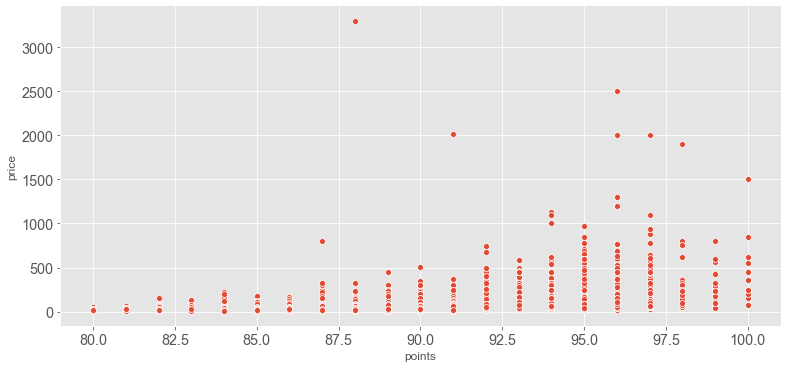

In [28]:
sns.pairplot(x_vars= 'points', y_vars= 'price', data= train, 
             height=5, aspect=15/7,)

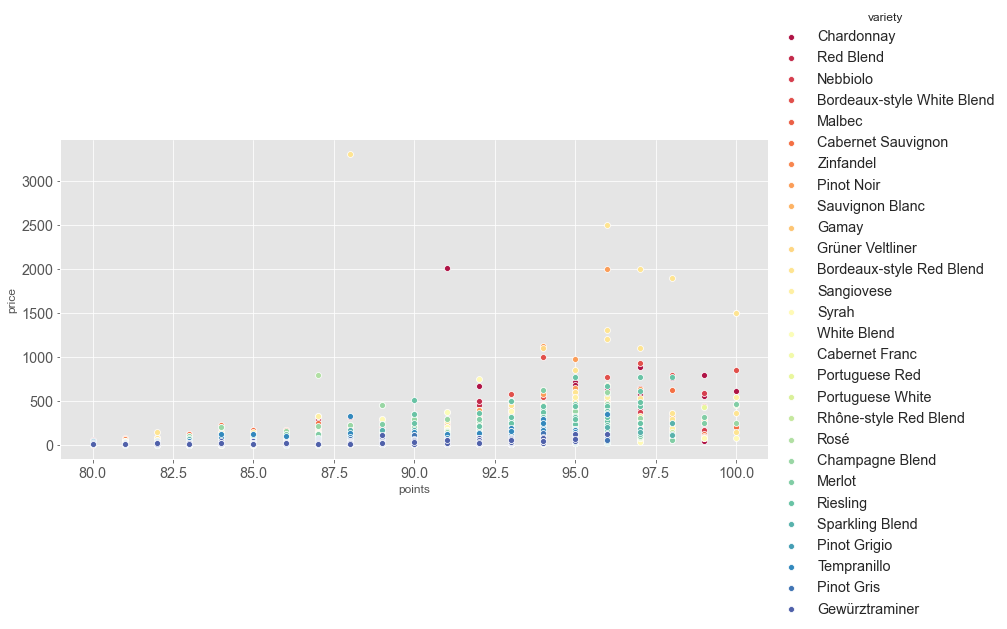

In [29]:
sns.pairplot(x_vars= 'points', y_vars= 'price', data= train, 
             height=5, aspect=15/7, hue='variety', palette= 'Spectral')
#plt.xticks(rotation=90)

In [30]:
train[train['price']>=1000]['variety'].unique()

array(['Bordeaux-style Red Blend', 'Pinot Noir', 'Chardonnay',
       'Grüner Veltliner', 'Bordeaux-style White Blend'], dtype=object)

In [31]:
train[train['price']>=1500]


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
3221,@vossroger,France,Château Lafite Rothschild 2010 Pauillac,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Château Lafite Rothschild,Bordeaux-style Red Blend
7769,@vossroger,France,Château Margaux 2009 Margaux,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Château Margaux,Bordeaux-style Red Blend
9133,@vossroger,France,Domaine du Comte Liger-Belair 2005 La Romanée,"A wonderfully complete wine, with all the elem...",NaN,96,2000.0,Burgundy,La Romanée,NaN,Domaine du Comte Liger-Belair,Pinot Noir
19993,@vossroger,France,Château Cheval Blanc 2010 Saint-Émilion,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Château Cheval Blanc,Bordeaux-style Red Blend
29706,@mattkettmann,US,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Blair,Chardonnay
51441,@vossroger,France,Château Pétrus 2011 Pomerol,This extravagantly perfumed wine has great jui...,NaN,97,2000.0,Bordeaux,Pomerol,NaN,Château Pétrus,Bordeaux-style Red Blend
60131,@vossroger,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Château les Ormes Sorbet,Bordeaux-style Red Blend
63394,@vossroger,France,Château Pétrus 2014 Pomerol,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Château Pétrus,Bordeaux-style Red Blend


All the expensive wine , except for one , are imported and have very high review points. These may indicate extreme points in our dataset but doesn't mean faulty data.

In [32]:
test[test['price']>1500]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
13497,@vossroger,France,Domaine du Comte Liger-Belair 2010 La Romanée,"A superb wine from a great year, this is power...",NaN,96,2500.0,Burgundy,La Romanée,NaN,Domaine du Comte Liger-Belair


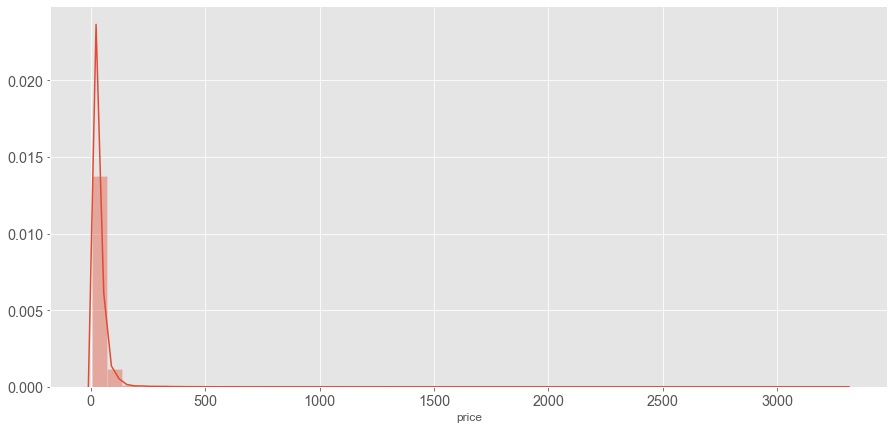

In [33]:
plt.figure(figsize=(15,7))
sns.distplot(train['price'])

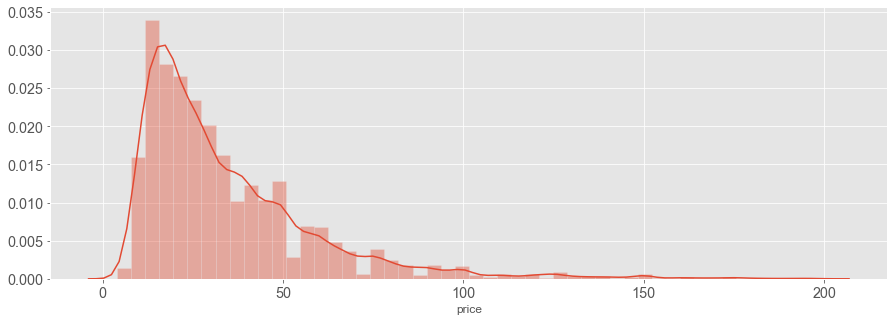

In [34]:
sns.distplot(train[train['price']<200]['price'])

In [35]:
train.groupby(['variety']).mean()['price'].sort_values(ascending= False)

variety
Champagne Blend               71.593011
Nebbiolo                      66.000534
Bordeaux-style Red Blend      47.988674
Cabernet Sauvignon            47.841416
Pinot Noir                    47.631775
Sangiovese                    45.412295
Syrah                         39.127523
Red Blend                     36.110309
Rhône-style Red Blend         35.344553
Cabernet Franc                34.932701
Chardonnay                    34.718591
Bordeaux-style White Blend    34.422868
Riesling                      32.431550
Tempranillo                   30.812894
Malbec                        30.284474
Sparkling Blend               30.058572
Merlot                        29.633046
Zinfandel                     29.356009
Grüner Veltliner              28.251116
Gewürztraminer                25.847029
Portuguese Red                24.797842
White Blend                   23.341505
Pinot Gris                    22.919927
Gamay                         20.762406
Sauvignon Blanc               20

In [36]:
train.groupby(['variety']).mean()['points'].sort_values(ascending= False)

variety
Nebbiolo                      90.283675
Grüner Veltliner              90.051185
Champagne Blend               89.723742
Riesling                      89.465284
Pinot Noir                    89.417210
Syrah                         89.278347
Rhône-style Red Blend         89.171743
Bordeaux-style Red Blend      89.102601
Portuguese Red                88.780599
Bordeaux-style White Blend    88.692941
Cabernet Sauvignon            88.581303
Gewürztraminer                88.578571
Sangiovese                    88.532564
Pinot Gris                    88.499129
Red Blend                     88.407201
Chardonnay                    88.325641
Cabernet Franc                88.191781
Sparkling Blend               88.062105
Gamay                         88.058824
Malbec                        87.990562
Zinfandel                     87.849253
Tempranillo                   87.537293
Sauvignon Blanc               87.461980
White Blend                   87.381329
Merlot                        87

In [37]:
train.groupby(['user_name','variety']).mean()['points'].sort_values(ascending= False)

user_name         variety                   
@gordone_cellars  Champagne Blend               94.000000
@AnneInVino       Merlot                        94.000000
@mattkettmann     Nebbiolo                      92.266667
@worldwineguys    Rhône-style Red Blend         91.750000
@AnneInVino       Riesling                      91.663551
                                                  ...    
@wineschach       Bordeaux-style White Blend    83.000000
@laurbuzz         Tempranillo                   82.000000
@winewchristina   Sauvignon Blanc               82.000000
@suskostrzewa     Nebbiolo                      81.500000
@JoeCz            Cabernet Franc                80.000000
Name: points, Length: 296, dtype: float64

# Feature Selection and Engineering

## Feature Engineering

### Vintage

In [38]:
# Extract vintage from review_title
import re
vintage_list=[]
for text in train['review_title']:
    year= re.findall('(\d{4})', text)
    year= map(int, year)
    try:
        vintage= max(year)
        # Assuming that vintages below 1950 are very rare and 
        # above 2020 not possible in our dataset
        # no vintage year is marked as zero
        if vintage> 2020 or vintage< 1950:            
            vintage= 0
        else:
            vintage= str(vintage )        
    except:
        vintage= 0
    
    vintage_list.append(vintage)

In [39]:
train['vintage'] = pd.DataFrame(vintage_list,columns=['vintage'], dtype = int)

In [40]:
train['vintage'].value_counts()

2012    10368
2014    10325
2013    10272
2011     7964
2010     7892
2009     6399
2015     6139
2008     4630
2007     4201
2006     3579
0        2578
2005     2300
2016     2261
2004     1061
2000      512
1999      449
2001      439
1998      394
2003      309
2002      238
1997      216
1996       40
1995       33
1994       15
1992       13
2017        7
1988        5
1991        4
1990        4
1989        4
1985        3
1993        1
1986        1
1976        1
Name: vintage, dtype: int64

The aging of wine is not straightforward. Not all wine benefit from aging and usually, except for premium ones, most wines should be consumed within 5 years after purchase. A wine's vintage effects its taste and quality but a good year depends on the region's weather patterns for that year. Some websites such as Berry Bros & Rudd, Robert Parker publish vintage charts specific to region and year, however, we can explore that at a later time. For now, we create baskets in order to group years together. 

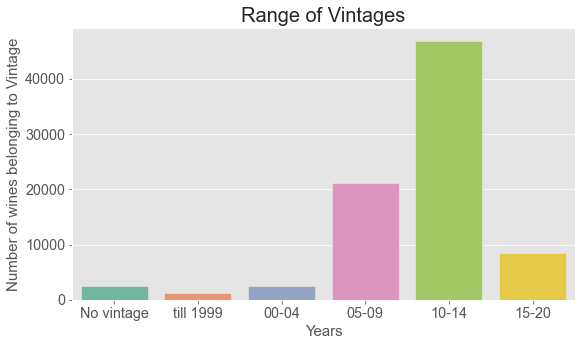

In [41]:
df= train
var= 'vintage'
b_0 = df[var][(df[var]==0)]
b_5 = df[var][(df[var] >= 1950) & (df[var] <= 1999)]
b_10 = df[var][(df[var] >= 2000) & (df[var] <= 2004)]
b_15 = df[var][(df[var] >= 2005) & (df[var] <= 2009)]
b_20 = df[var][(df[var] >= 2010) & (df[var] <= 2014)]
b_25 = df[var][(df[var] >= 2015) & (df[var] <= 2020)]

bx = ["No vintage", "till 1999", "00-04", "05-09","10-14","15-20"]
by = [len(b_0.values),len(b_5.values), len(b_10.values), len(b_15.values), 
      len(b_20.values),len(b_25.values)]

plt.figure(figsize=(9,5))
sns.barplot(x=bx, y=by, palette="Set2")
plt.title("Range of Vintages",fontsize=20)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of wines belonging to Vintage",fontsize=15)
plt.show()

(array([1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 6 Text major ticklabel objects>)

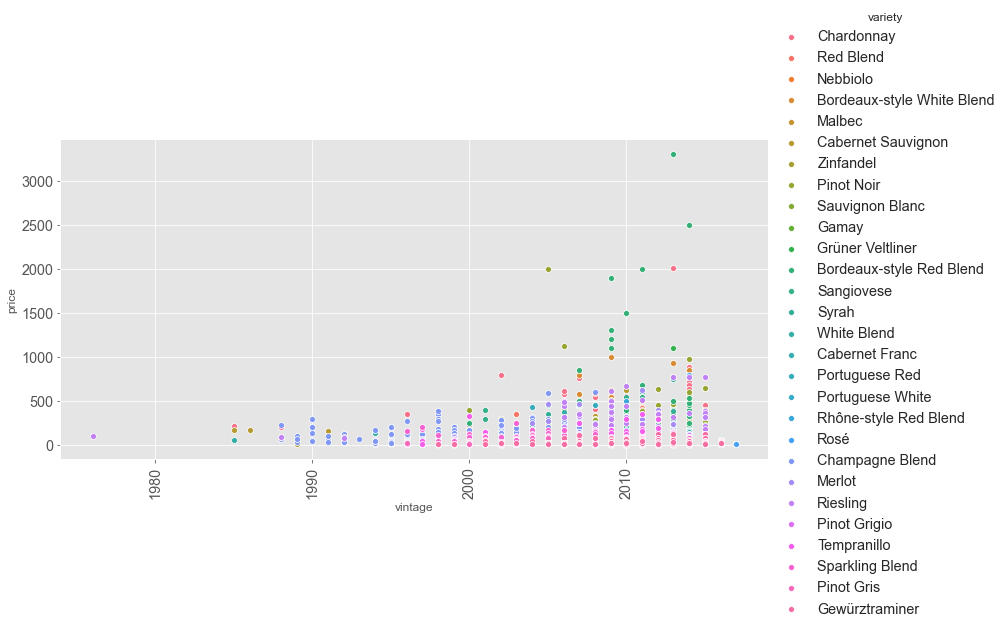

In [42]:
sns.pairplot(x_vars= 'vintage', y_vars= 'price', data= train[train['vintage']>0], 
             height=5, aspect=15/7, hue='variety')
plt.xticks(rotation=90)

We observe a grouping of varieties across vintages.

In [43]:
train.groupby(['vintage']).count()['price'].sort_values(ascending= False).head(10)

vintage
2014    9868
2013    9825
2012    9680
2011    7237
2010    7177
2015    5936
2009    5863
2008    4193
2007    3893
2006    3195
Name: price, dtype: int64

In [44]:
train['vintage'].dtype

dtype('int64')

In [45]:
train[(train['vintage']>2005) & (train['vintage']<2015)].groupby('vintage').mean()['price'].sort_values(ascending= False)

vintage
2009    40.698618
2006    39.391236
2007    39.275366
2012    38.941322
2010    38.700153
2008    38.425948
2013    38.412621
2011    38.121597
2014    35.430685
Name: price, dtype: float64

In [46]:
train[(train['vintage']==0)].groupby('vintage').mean()['price'].sort_values(ascending= False)

vintage
0    33.698393
Name: price, dtype: float64

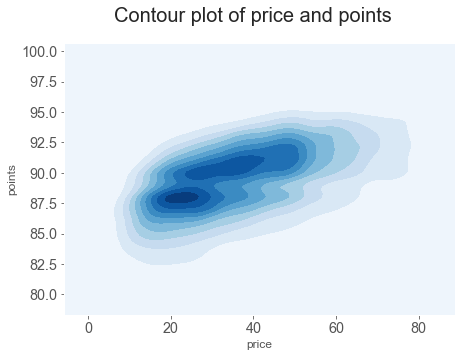

In [47]:
l = train[train['price']<80].dropna()
plt.figure(figsize=(7,5))
sns.kdeplot(l['price'], l['points'],
            cmap="Blues", shade=True, shade_lowest=True)
plt.suptitle('Contour plot of price and points', fontsize= 20)
plt.show()


In [48]:
train.groupby(['points','variety']).count()['price'].sort_values(ascending= False).head(15)

points  variety           
90      Pinot Noir            1193
92      Pinot Noir            1160
91      Pinot Noir            1115
87      Chardonnay            1102
88      Pinot Noir            1098
        Chardonnay            1067
87      Pinot Noir            1034
88      Red Blend              994
90      Chardonnay             989
87      Red Blend              981
        Cabernet Sauvignon     911
93      Pinot Noir             906
90      Red Blend              882
        Cabernet Sauvignon     869
89      Pinot Noir             840
Name: price, dtype: int64

#### 4.  Wine Variety,  vintage , price and points
#### Insight:

The top 10 popular vintages are years 2006-2014. And the average price range for these bottles is from $ 35-40. 

A wine bottle with no vintage is cheaper than the popular vintages selling at average of $ 33.7. 

#### Action:
The online listings could be curated in the price range of $ 30-40 and whose points range from 85-93 points as they seem to be most popular. From our dataset, we observe that wine varieties Pinor Noir and Chardonnay are extremely popular amongst reviewers. This would lead to more turnover and less inventory costs, thereby improving the margins of The Wine Land. 


### Bag of words

In [49]:
import nltk
from nltk import word_tokenize
import string
import itertools

In [50]:
def count_words(df):
    """
    input: df- refers to the column in dataset for which we convert phrases to words
    output: list of lists with words for each row    
    """
    word_list=[]
    for row in df:
        # split into words
        tokens = word_tokenize(row)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        import string
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        # filter out stop words
        from nltk.corpus import stopwords
        stop_words = set(stopwords.words('english'))
        ## add more unwated words here
        unwanted_words =['de''wa','la','wine','drink','notes','nose']
        words = [w for w in words if not w in stop_words ]
        words= [w for w in words if not w in unwanted_words]
        word_list.append(words)
    return word_list

In [51]:
def top_n_words(df,n):
    """
    input: df- all words grouped together into flatwords,
            n- number of words we want frequencies for
    output: words and their frequency of occurence
    """
    fdist= nltk.FreqDist(df)
    fdist_n= fdist.most_common(n)
    return fdist_n

In [52]:
def chart_topnwords(fdist, title, n):
    """
    input: fdist- words and frequencies
           title- column for which we create the chart
               n- top words we want to display
    output: a barchart displaying words on x axis and their respective counts on y-axis
    """
    plt.style.use('ggplot')
    labels, values = zip(*fdist)
    fig = plt.figure(figsize=(10,7))  
    ax= fig.add_subplot()
    l= np.arange(len(labels))
    sns.barplot(l, values)
    plt.xticks(l, labels, rotation=90) 
    plt.xlabel('words', fontsize=18)
    plt.ylabel('counts', fontsize= 18)
    plt.suptitle('%d most common words in %s'%(n, title) , fontsize=30)
    plt.show()

First we observe the top 10-20 words for review_title overall and for each variety. We do the same for review-description. I observe that the review title often has a mention of the variety of wine, which is our target variable. So, I include these words in my bag of words so that my classification algorithm fares better than otherwise. 

#### Review Title

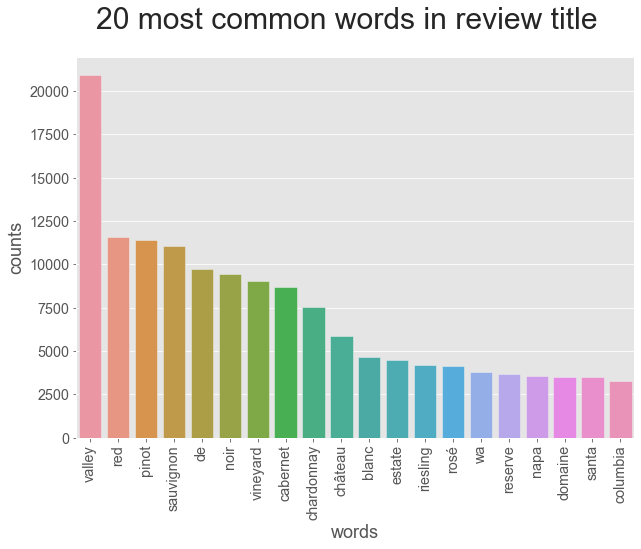

In [53]:

train['review_title_words']= count_words(train['review_title'])
test['review_title_words']= count_words(test['review_title'])
words_total=[]
for row in train['review_title_words']:
    words_total.append(row)
title_flat_words =itertools.chain.from_iterable(words_total)
title_fdist_20 = top_n_words(title_flat_words,20)
chart_topnwords(title_fdist_20, 'review title',20)

[('château', 3418), ('red', 2063), ('de', 1524), ('bordeaux', 1280), ('valley', 920)]


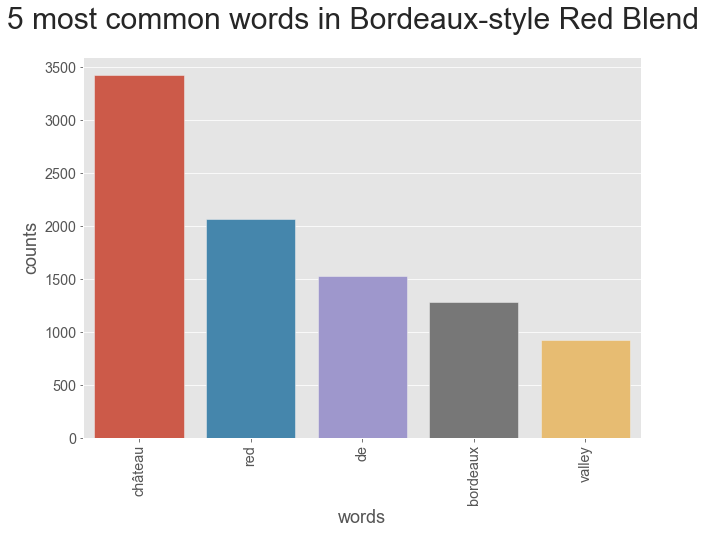

[('château', 693), ('bordeaux', 389), ('blanc', 379), ('de', 233), ('sauternes', 117)]


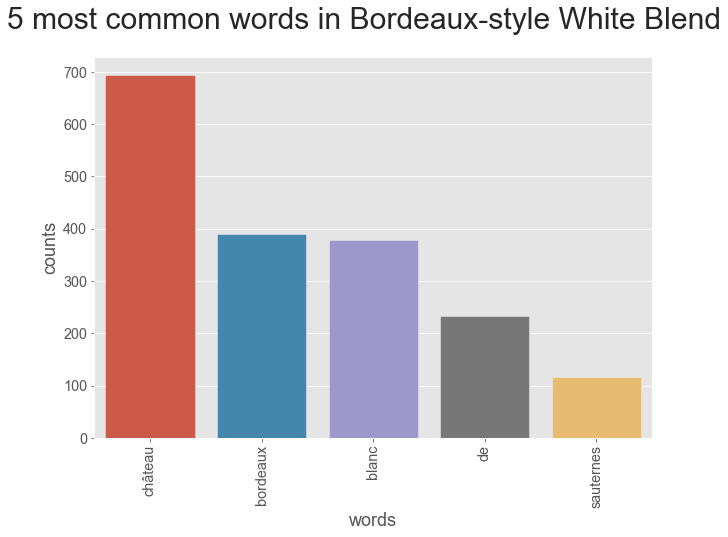

[('franc', 1012), ('cabernet', 1005), ('valley', 369), ('vineyard', 161), ('estate', 112)]


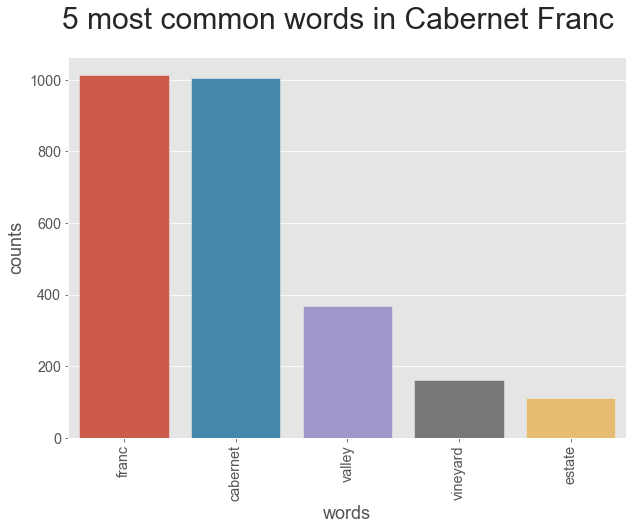

[('cabernet', 7570), ('sauvignon', 7563), ('valley', 3627), ('napa', 1445), ('vineyard', 1120)]


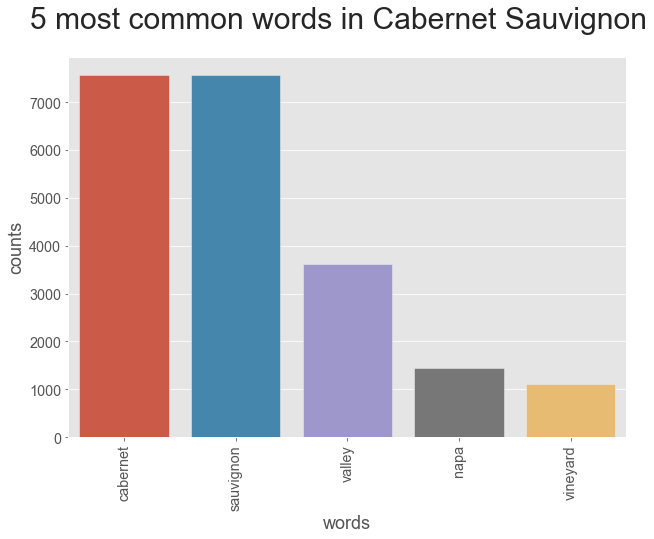

[('champagne', 1009), ('brut', 980), ('nv', 718), ('rosé', 307), ('de', 183)]


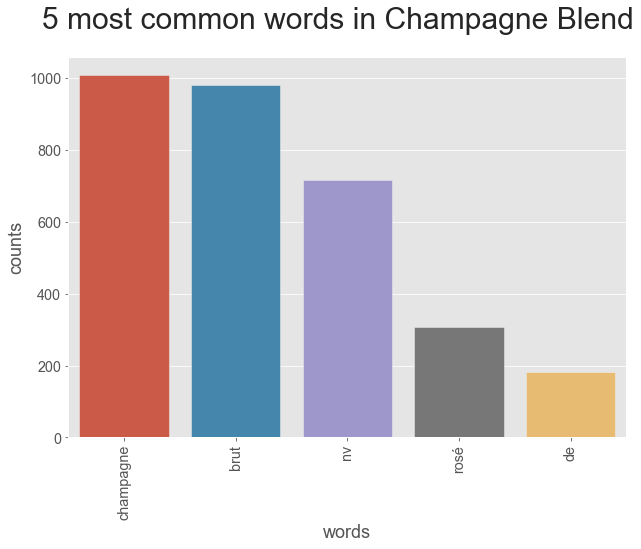

[('chardonnay', 7522), ('valley', 2811), ('vineyard', 1281), ('de', 1023), ('river', 825)]


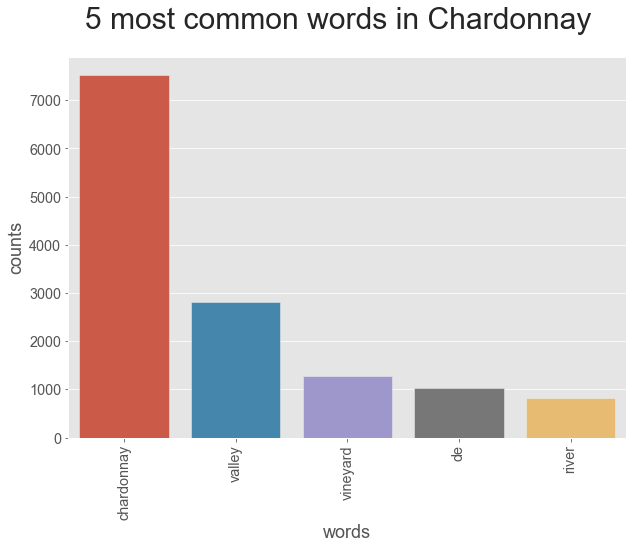

[('de', 323), ('domaine', 296), ('beaujolaisvillages', 167), ('château', 151), ('georges', 137)]


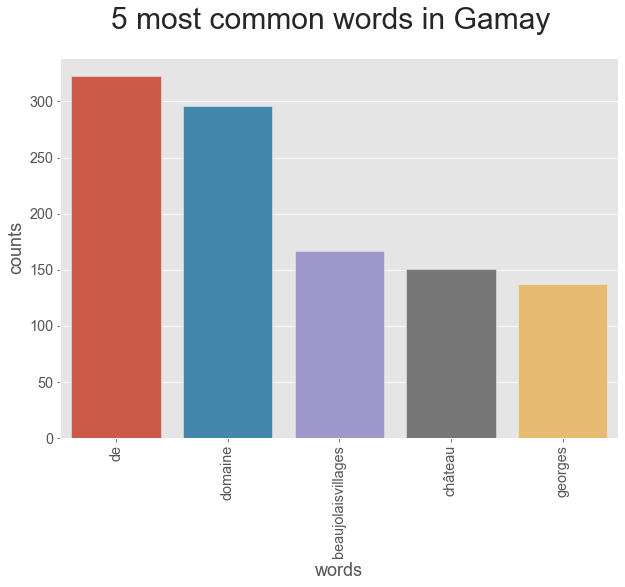

[('gewurztraminer', 438), ('gewürztraminer', 403), ('alsace', 390), ('valley', 174), ('domaine', 160)]


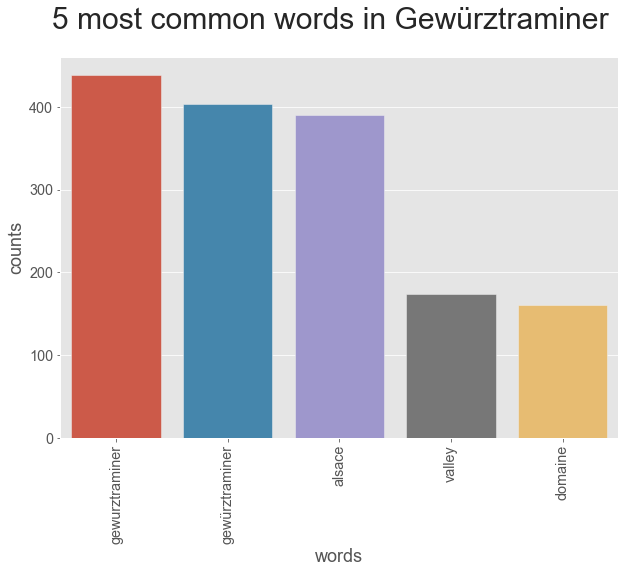

[('veltliner', 1060), ('grüner', 1058), ('niederösterreich', 225), ('reserve', 224), ('kamptal', 185)]


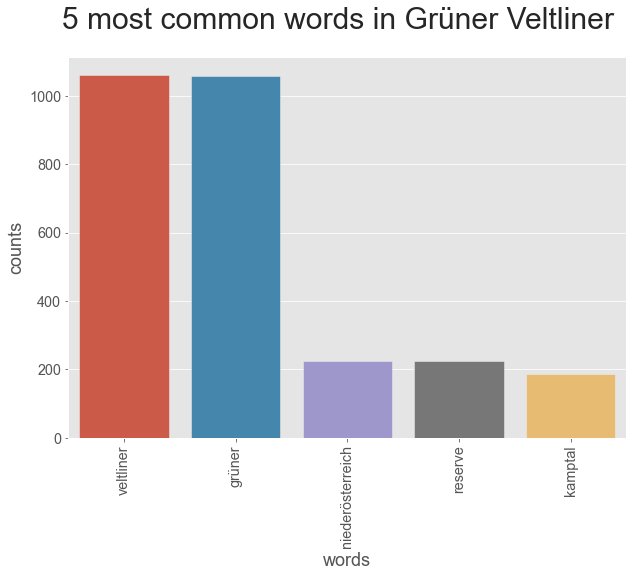

[('malbec', 2122), ('mendoza', 760), ('valley', 496), ('de', 339), ('cahors', 305)]


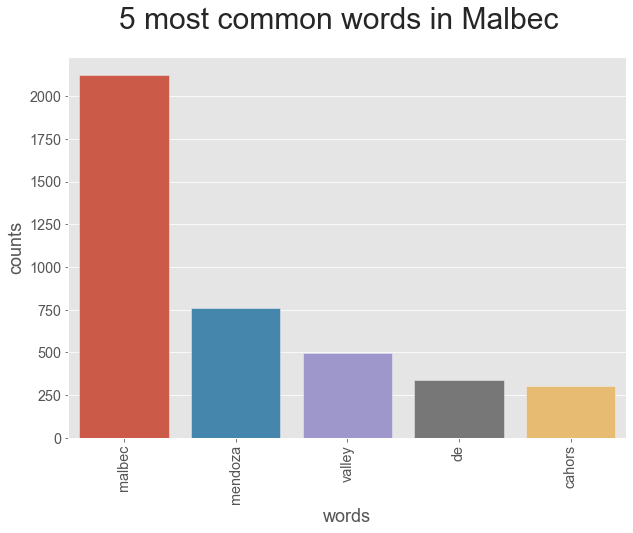

[('merlot', 2429), ('valley', 1150), ('wa', 358), ('napa', 306), ('columbia', 304)]


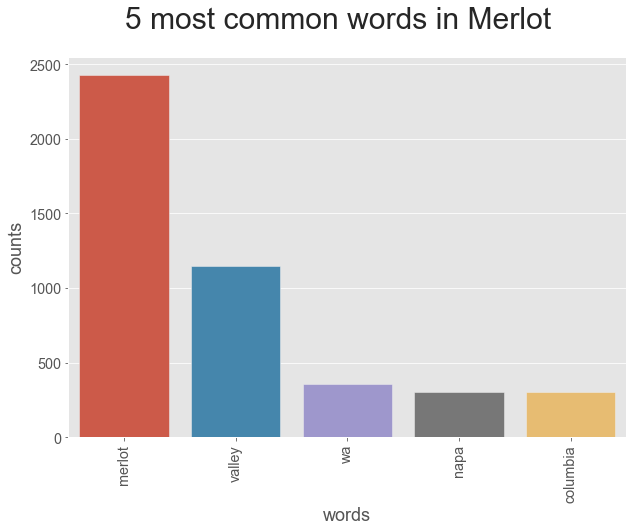

[('barolo', 1348), ('barbaresco', 653), ('di', 233), ('riserva', 231), ('nebbiolo', 181)]


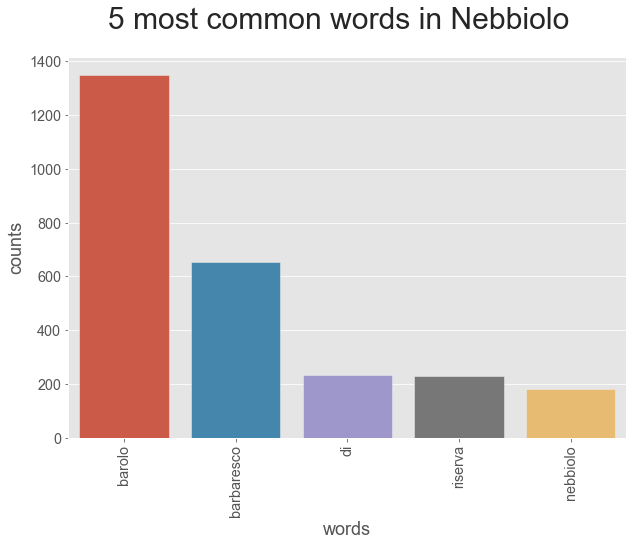

[('pinot', 885), ('grigio', 882), ('california', 127), ('friuli', 111), ('alto', 100)]


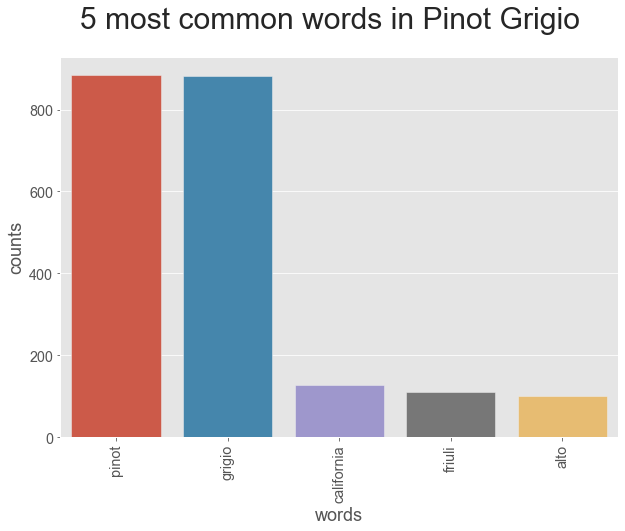

[('gris', 1152), ('pinot', 1151), ('valley', 403), ('alsace', 345), ('willamette', 206)]


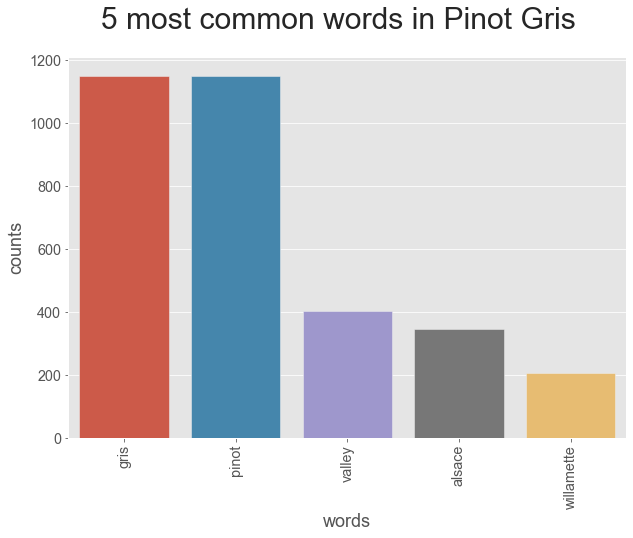

[('noir', 9299), ('pinot', 9292), ('valley', 3652), ('vineyard', 2929), ('river', 1219)]


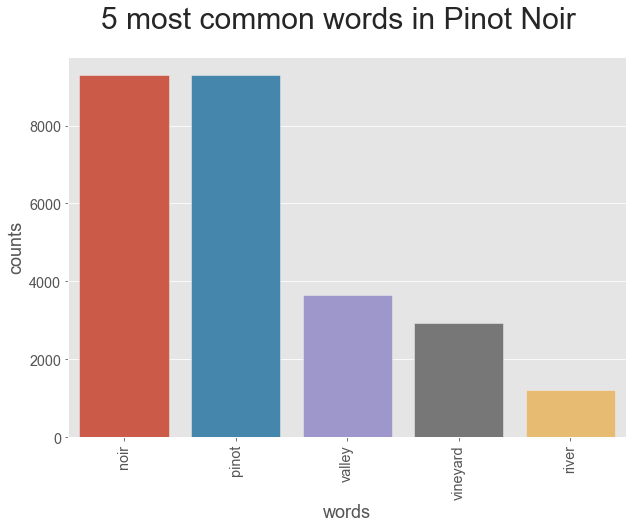

[('red', 1973), ('douro', 735), ('quinta', 587), ('reserva', 552), ('de', 442)]


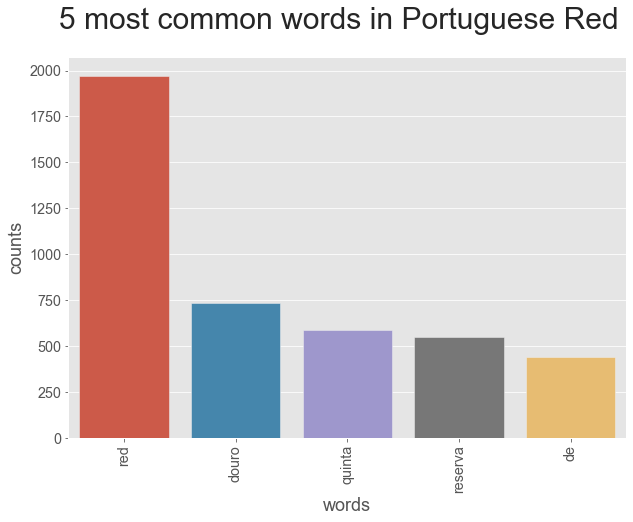

[('white', 900), ('branco', 427), ('de', 241), ('douro', 227), ('quinta', 199)]


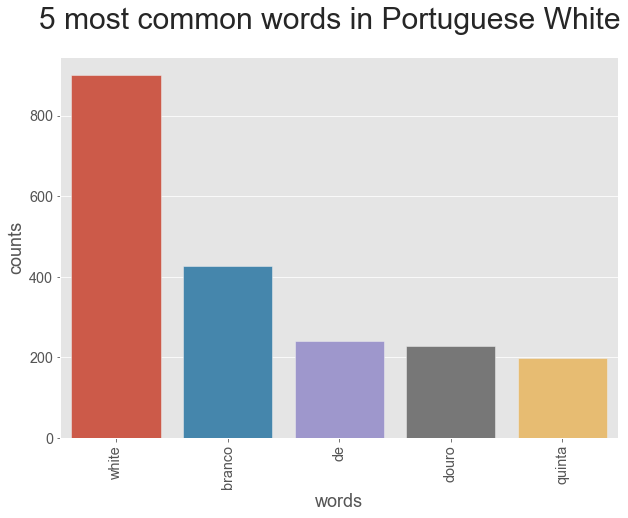

[('red', 5718), ('valley', 1359), ('di', 837), ('classico', 675), ('toscana', 580)]


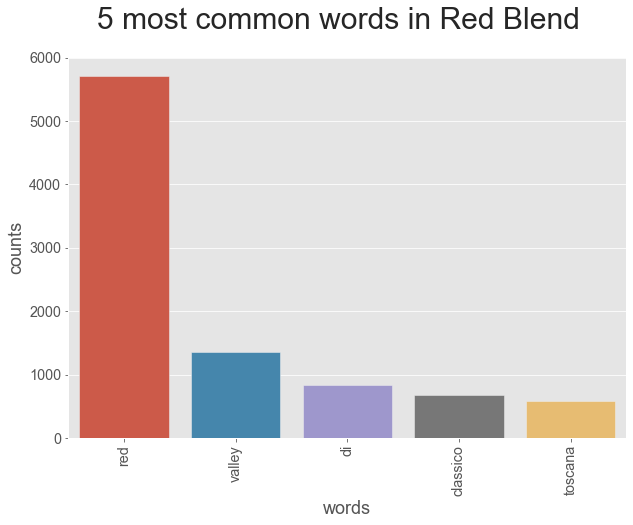

[('red', 1186), ('de', 296), ('du', 257), ('côtes', 202), ('valley', 187)]


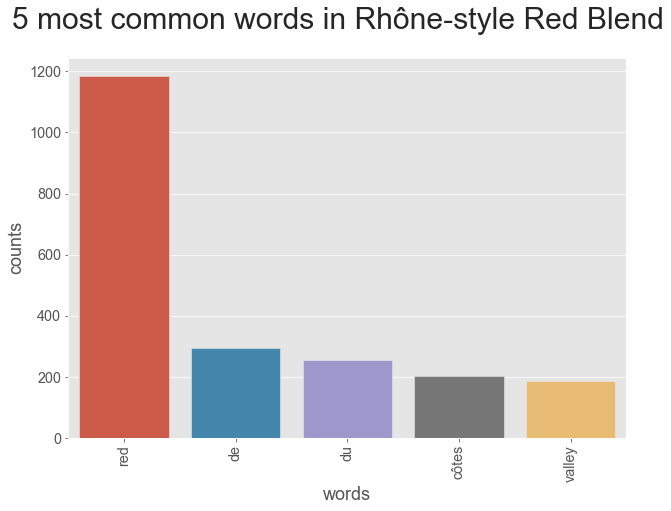

[('riesling', 4182), ('mosel', 825), ('alsace', 556), ('valley', 517), ('lakes', 488)]


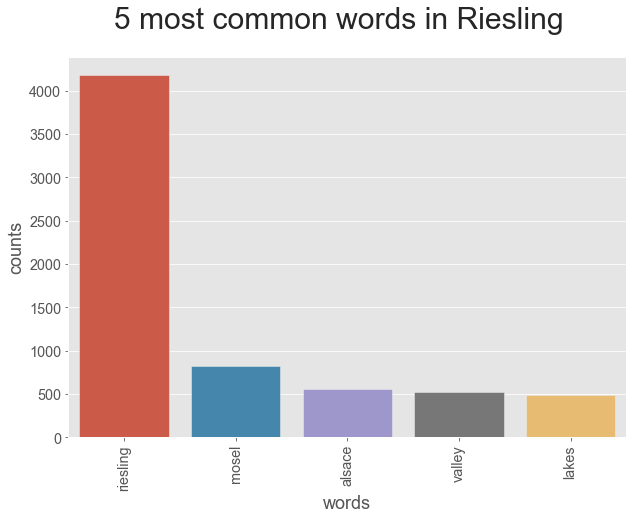

[('rosé', 3025), ('de', 1495), ('provence', 723), ('côtes', 718), ('château', 637)]


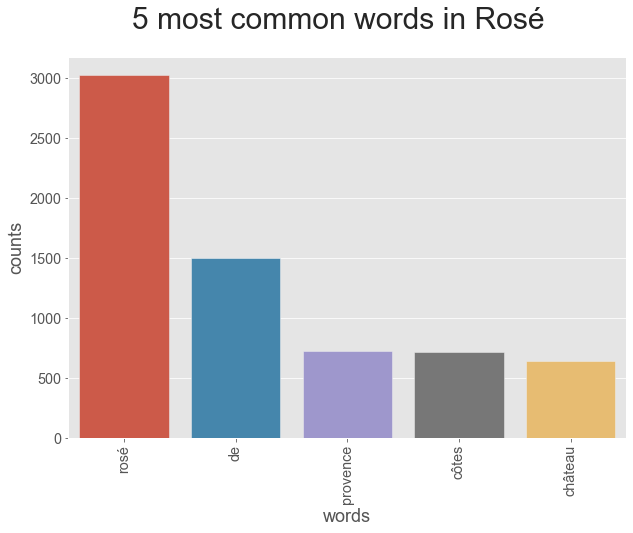

[('di', 1285), ('montalcino', 854), ('brunello', 663), ('sangiovese', 603), ('chianti', 564)]


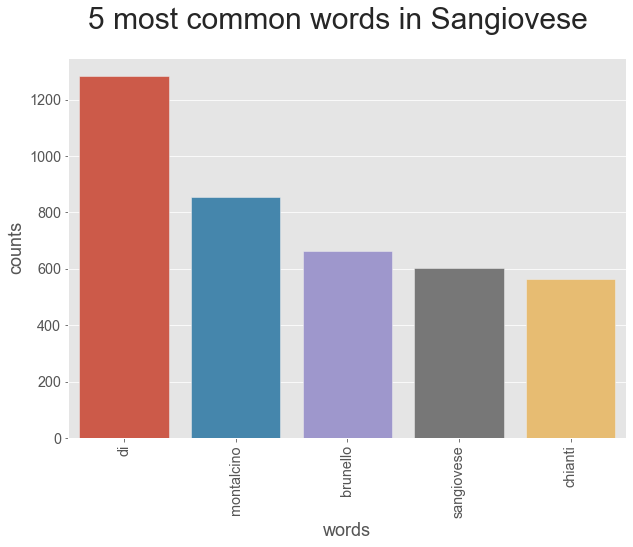

[('blanc', 3513), ('sauvignon', 3459), ('valley', 1466), ('marlborough', 363), ('vineyard', 347)]


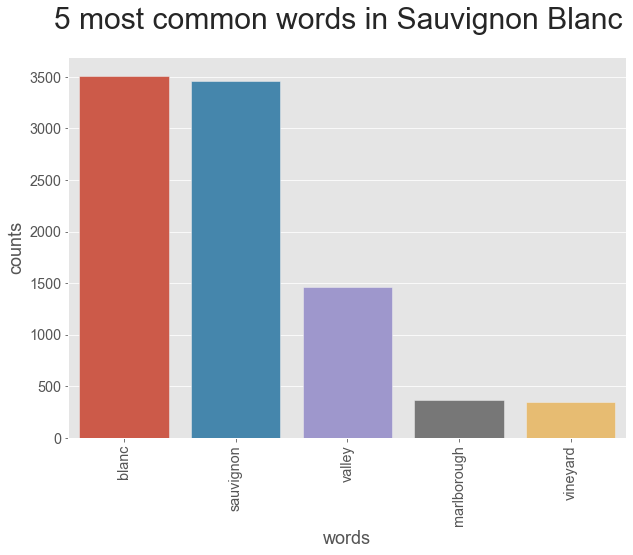

[('sparkling', 1734), ('brut', 1048), ('nv', 998), ('rosé', 382), ('cava', 372)]


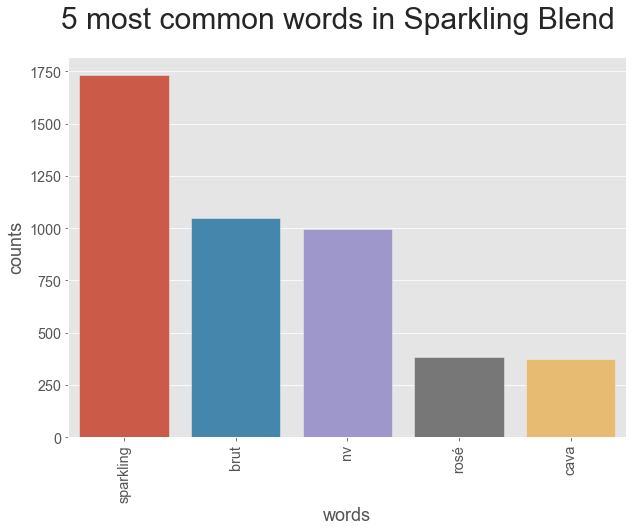

[('syrah', 3225), ('valley', 1567), ('vineyard', 900), ('wa', 530), ('walla', 485)]


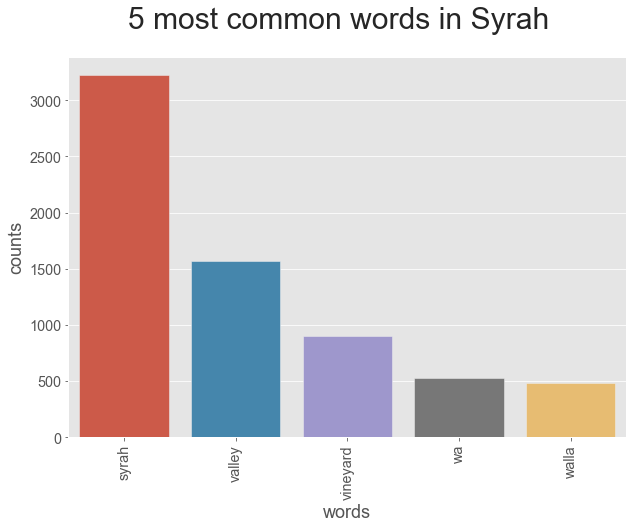

[('tempranillo', 567), ('rioja', 508), ('de', 451), ('del', 418), ('ribera', 376)]


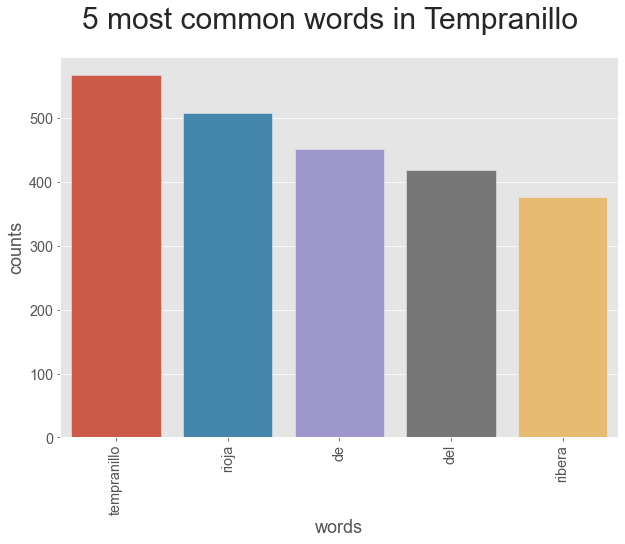

[('white', 1765), ('de', 309), ('valley', 198), ('di', 128), ('blanc', 113)]


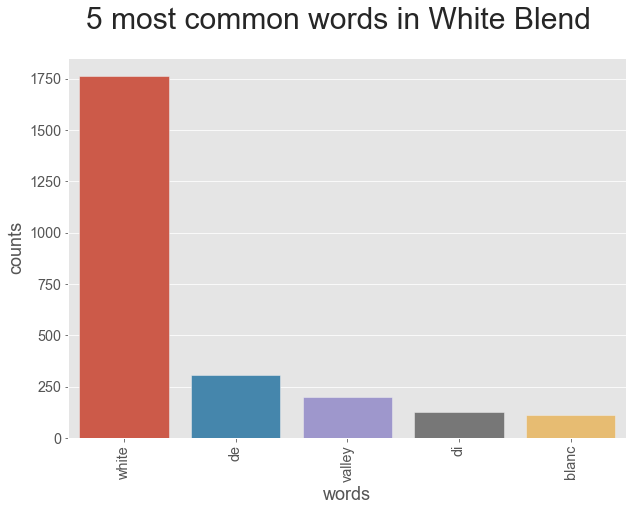

[('zinfandel', 2221), ('valley', 989), ('vineyard', 575), ('creek', 408), ('county', 386)]


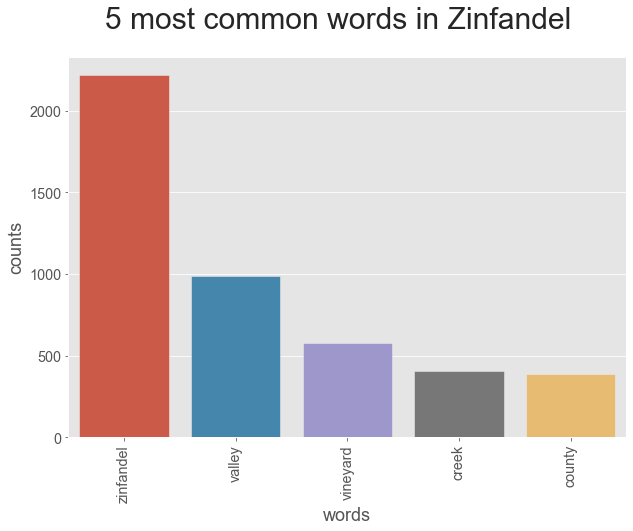

In [54]:
for name, group in train.groupby(['variety']):
    words_total=[]
    for row in group['review_title_words']:
        words_total.append(row)
    
    flat_words =itertools.chain.from_iterable(words_total)
    fdist_n= top_n_words(flat_words,5)
    print(fdist_n)
    chart_topnwords(fdist_n, name, 5)

#### Wine Variety

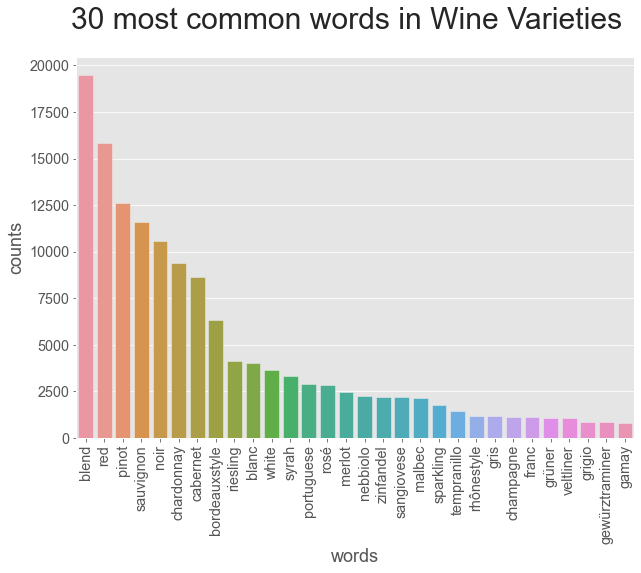

In [55]:
train['variety_words']= count_words(train['variety'])
words_total=[]
for row in train['variety_words']:
    words_total.append(row)
variety_flat_words =itertools.chain.from_iterable(words_total)
variety_fdist_20 = top_n_words(variety_flat_words,30)
chart_topnwords(variety_fdist_20, 'Wine Varieties',30)

#### Review description

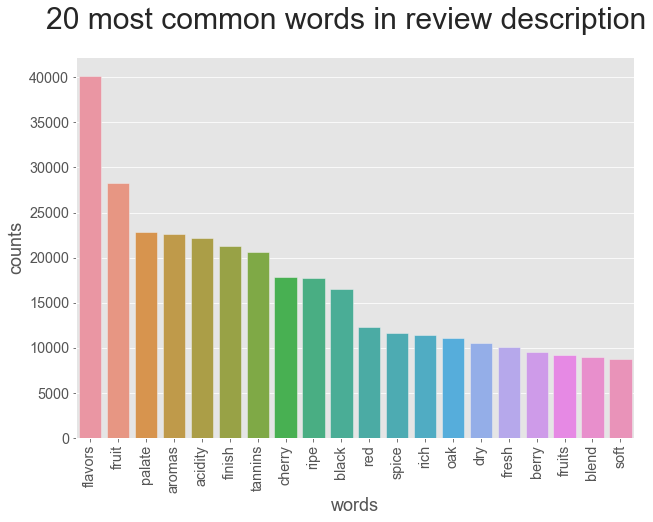

In [56]:
train['review_description_words']= count_words(train['review_description'])
test['review_description_words']= count_words(test['review_description'])
description_words_total=[]
for row in train['review_description_words']:
    description_words_total.append(row)
description_flat_words =itertools.chain.from_iterable(description_words_total)
description_fdist_20 = top_n_words(description_flat_words,20)
chart_topnwords(description_fdist_20, 'review description',20)

In [57]:
print(description_fdist_20)

[('flavors', 40194), ('fruit', 28313), ('palate', 22875), ('aromas', 22631), ('acidity', 22127), ('finish', 21250), ('tannins', 20607), ('cherry', 17897), ('ripe', 17721), ('black', 16563), ('red', 12282), ('spice', 11650), ('rich', 11463), ('oak', 11078), ('dry', 10529), ('fresh', 10119), ('berry', 9483), ('fruits', 9161), ('blend', 8930), ('soft', 8788)]


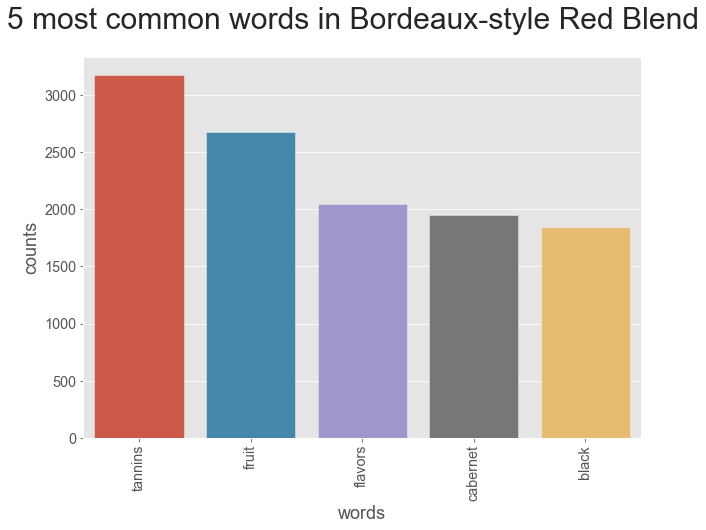

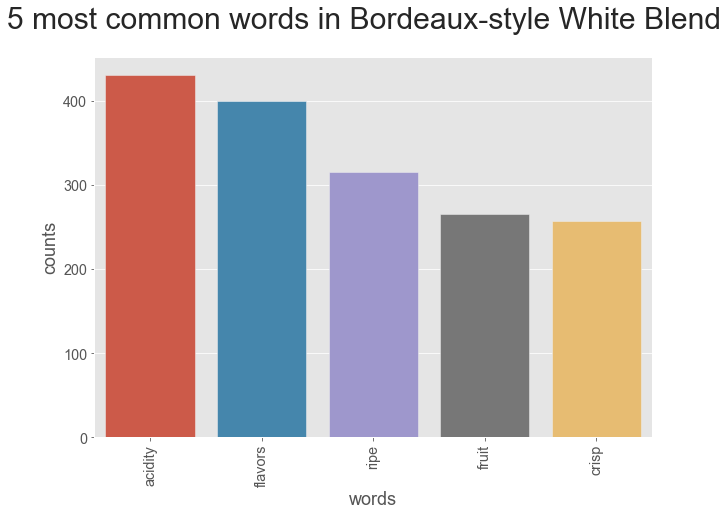

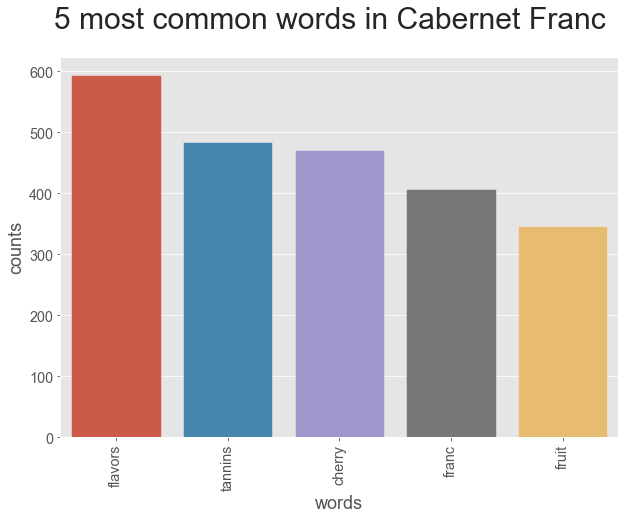

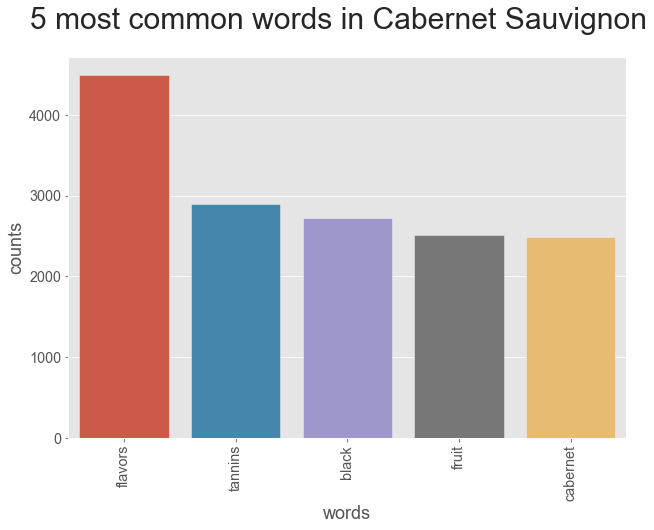

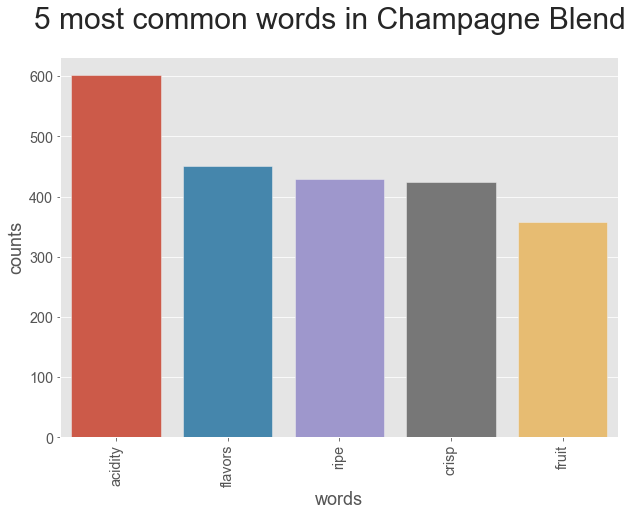

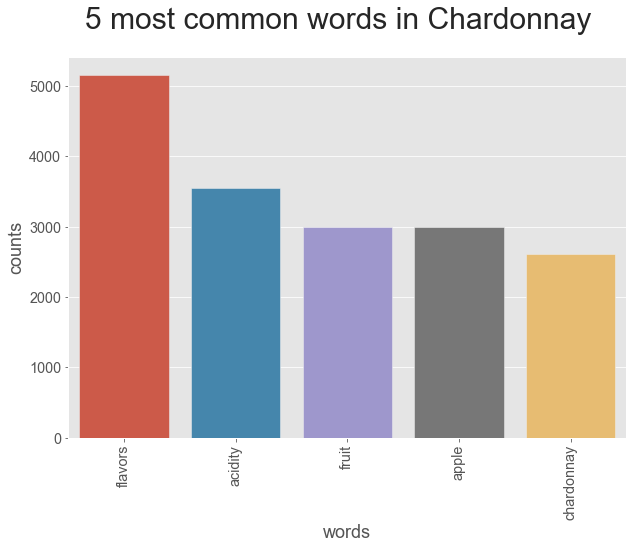

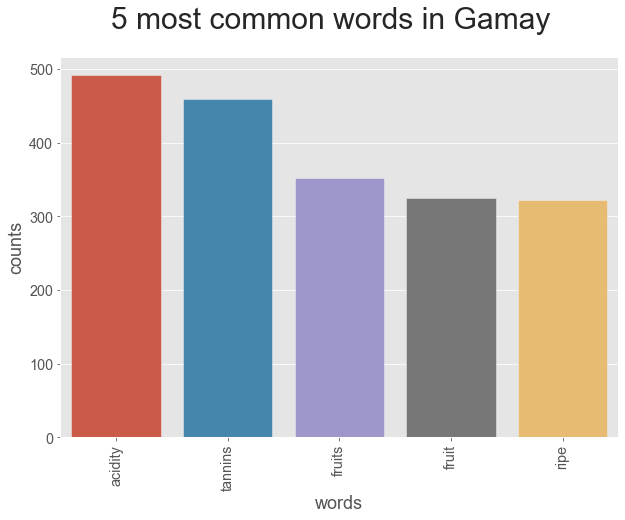

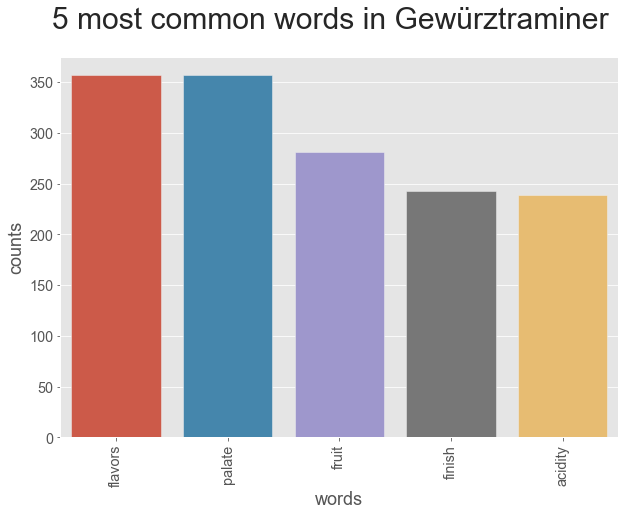

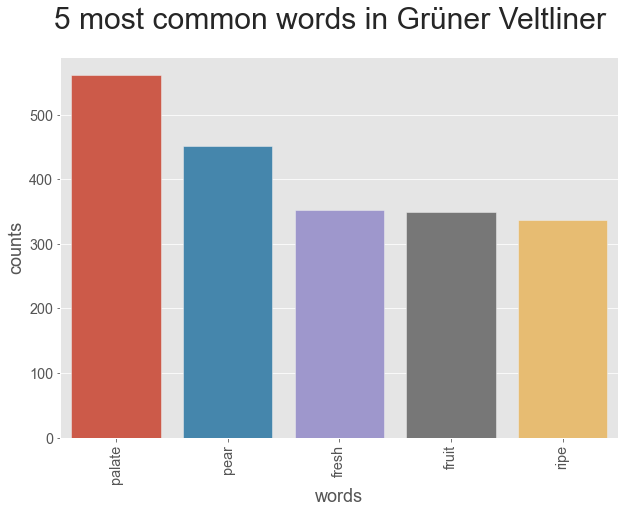

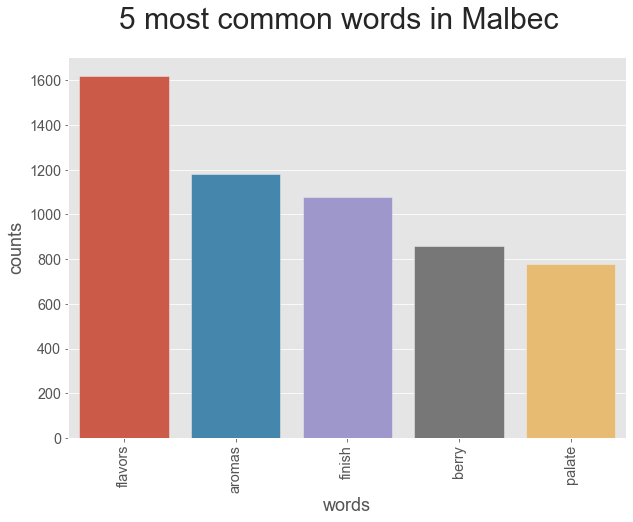

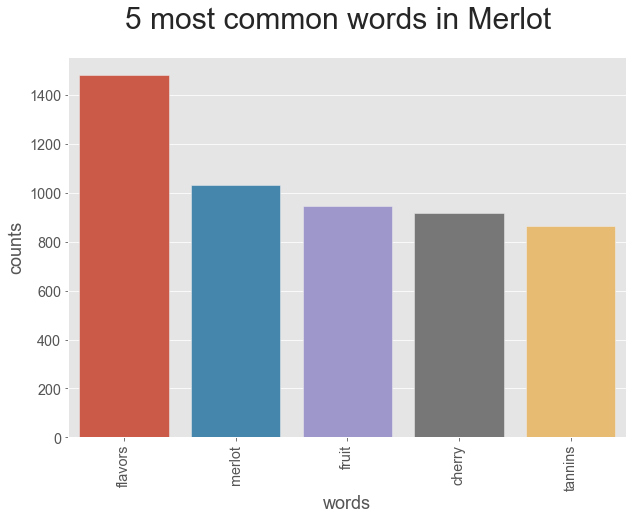

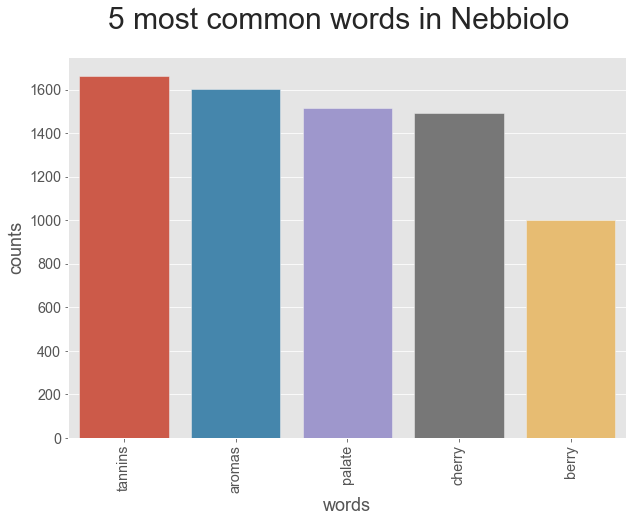

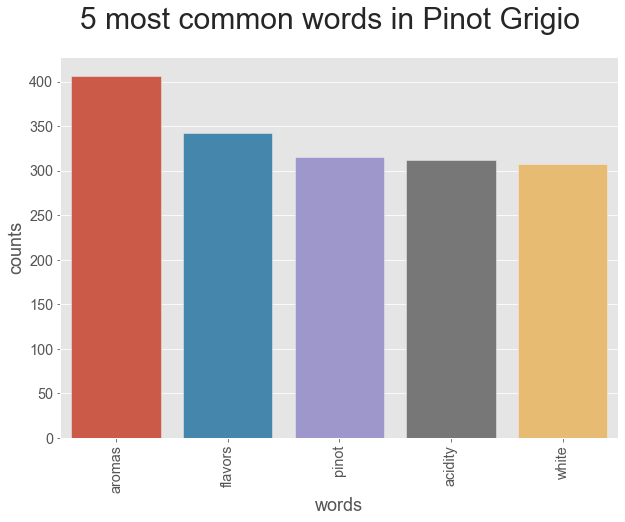

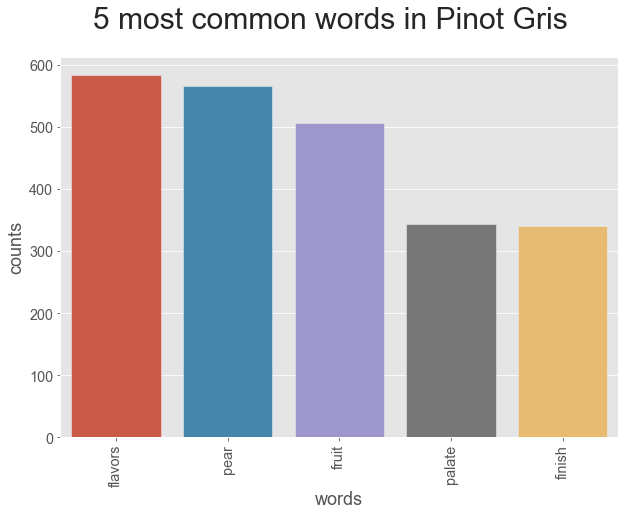

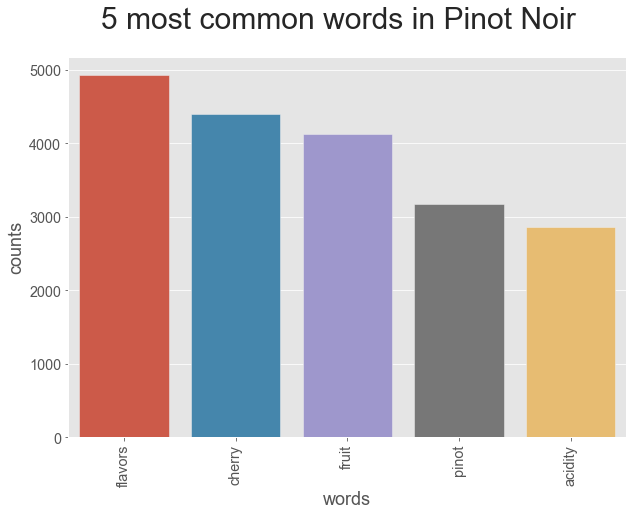

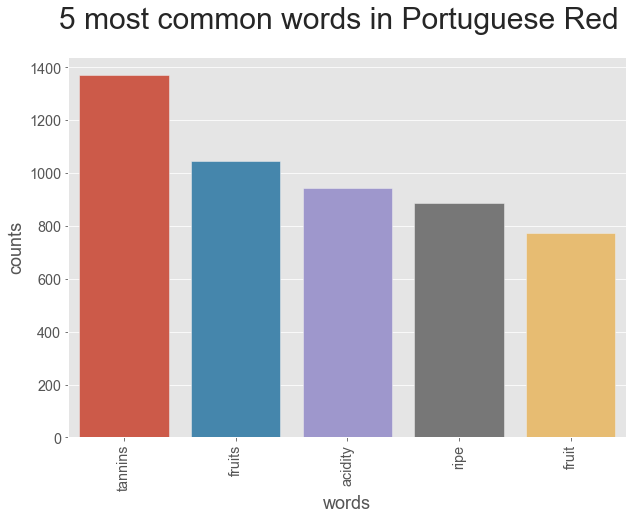

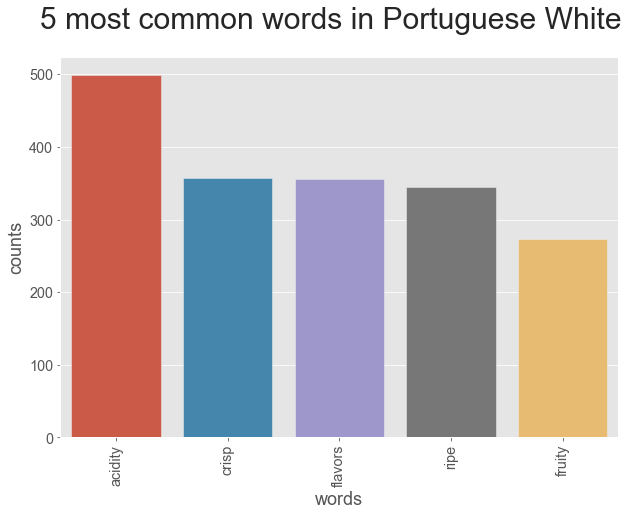

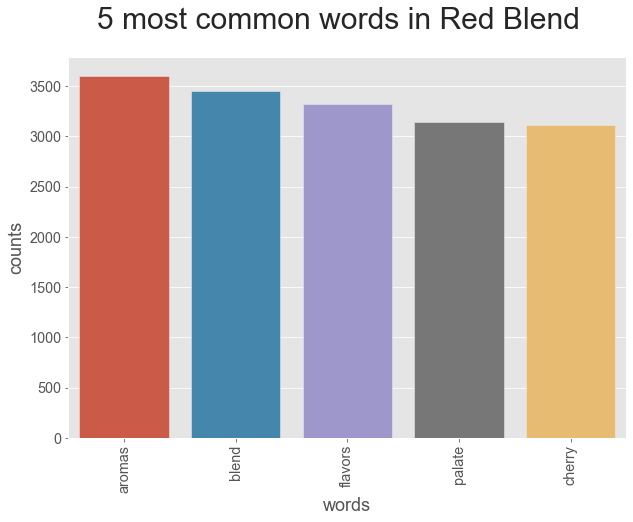

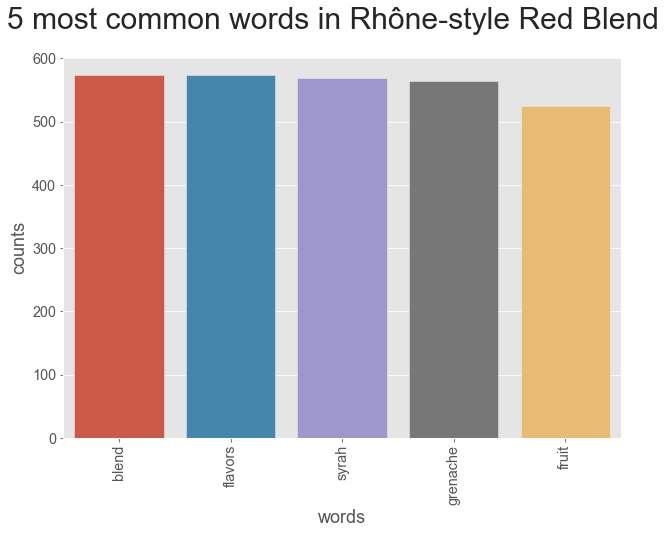

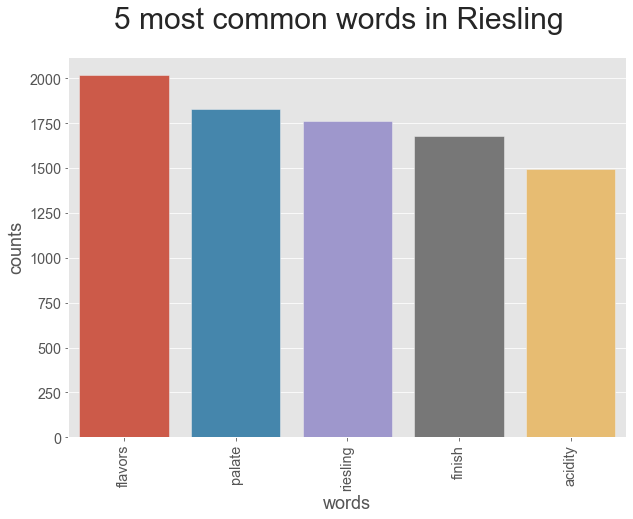

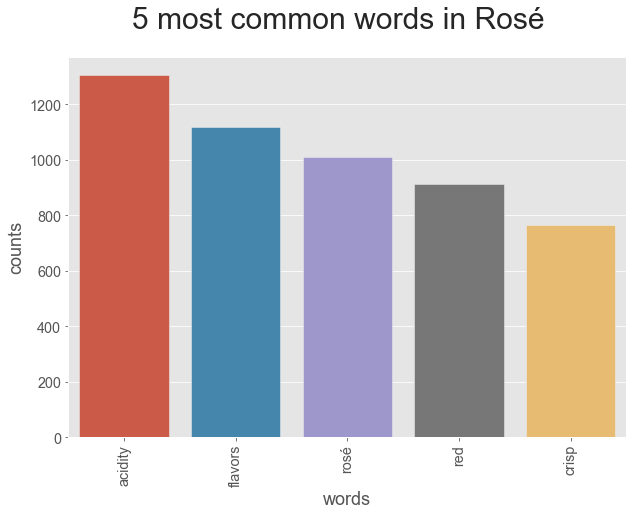

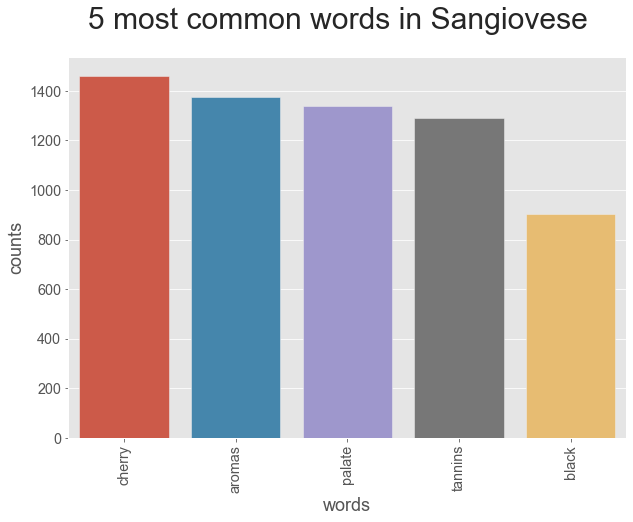

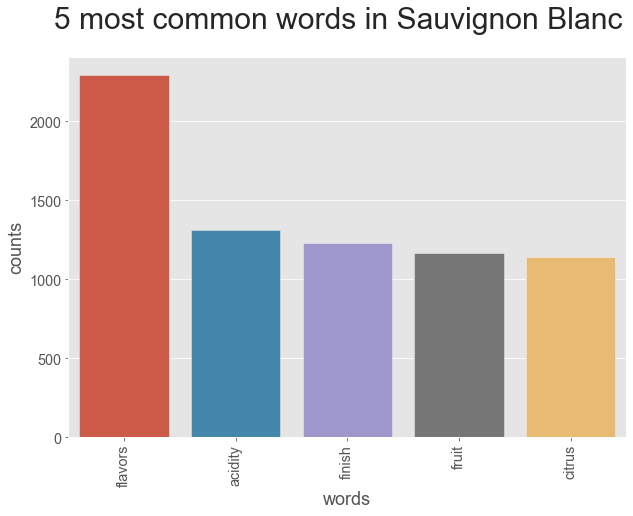

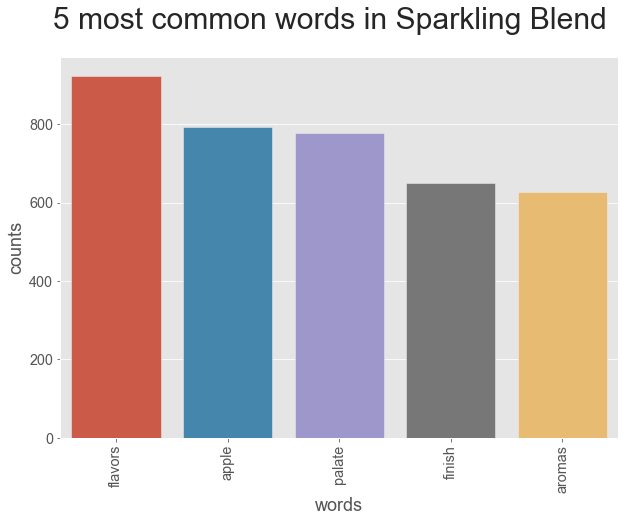

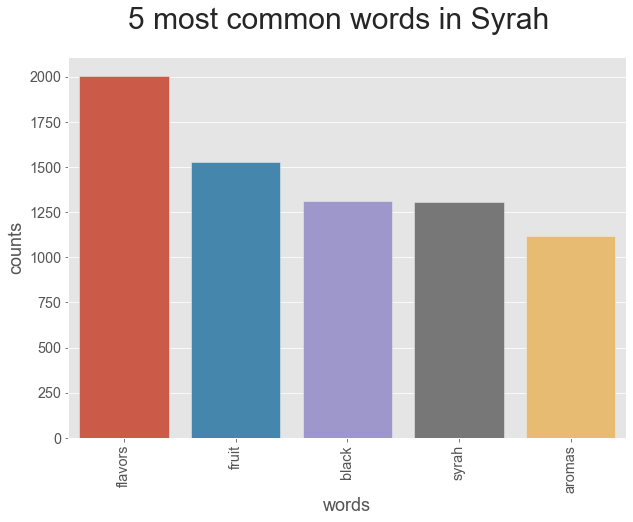

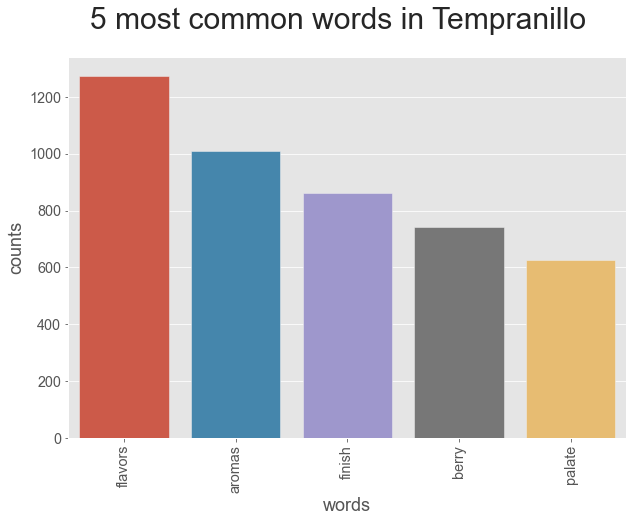

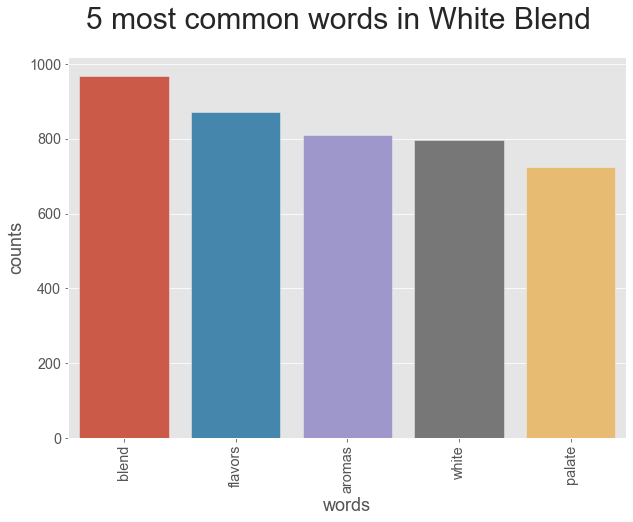

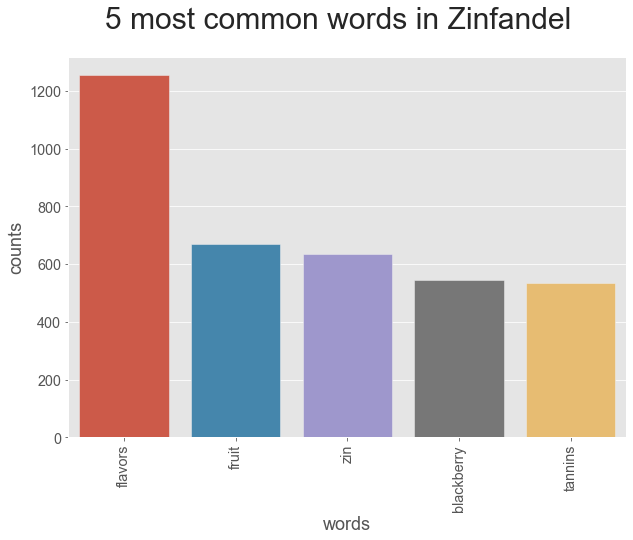

In [58]:
for name, group in train.groupby(['variety']):
    words_total=[]
    for row in group['review_description_words']:
        words_total.append(row)
    
    flat_words =itertools.chain.from_iterable(words_total)
    fdist_n= top_n_words(flat_words,5)
    chart_topnwords(fdist_n, name, 5)

#### Applying Bag of words model for Review title

The more popular and acceptable method of obtain bag of words is to retain n most frequently occuring words and create binary vector for each word based on presence and absence of the word. However, in our case, we want frequently occuring words per variety and it would be much better for the model to automatically recognize those words.

I have hard-coded them for now. ( I'd work on getting the list automatically in my next revision)

In [59]:
title_freq_words= ['château','red','bordeaux','blanc','franc','cabernet',
                   'sauvignon','champagne','brut','chardonnay','domaine',
                   'beaujolaisvillages','gewurztraminer','gewürztraminer',
                  'alsace','branco','verde','riesling','rosé','montalcino',
                   'sangiovese','chianti','syrah','rioja','ribera','zinfandel',
                  'veltliner','grüner','malbec','mendoza','merlot','barolo',
                   'barbaresco','nebbiolo','pinot','grigio','gris','noir',
                  'quinta','douro','alentejano','white','toscana','provence',
                   'brunello','marlborough','sparkling','cava','vineyard',
                   'tempranillo','valley','riserva','reserve','reserva']

In [60]:
title_vector_train = [] 
for row in train['review_title_words']: 
    vector = [] 
    for word in title_freq_words: 
        if word in row: 
            vector.append(1) 
        else: 
            vector.append(0) 
    title_vector_train.append(vector) 
title_vector_train = np.asarray(title_vector_train)

In [61]:
title_vector_test = [] 
for row in test['review_title_words']: 
    vector = [] 
    for word in title_freq_words: 
        if word in row: 
            vector.append(1) 
        else: 
            vector.append(0) 
    title_vector_test.append(vector) 
title_vector_test = np.asarray(title_vector_test)

In [62]:
title_vector_train.shape

(82657, 54)

In [63]:
title_vector_test.shape

(20665, 54)

#### Applying Bag of words model for Review description

In [64]:
description_freq_words=['zin','finish','apple', 'citrus','cherry','acidity',
                        'crisp','blend','fruit','ripe','pear','black',
                        'blackberry','berry','flavors','palate','aromas',
                        'tannins','spice','rich','oak','dry','fresh','soft']

In [65]:
description_vector_train = [] 
for row in train['review_description_words']: 
    vector = [] 
    for word in description_freq_words: 
        if word in row: 
            vector.append(1) 
        else: 
            vector.append(0) 
    description_vector_train.append(vector) 
description_vector_train = np.asarray(description_vector_train)

In [66]:
description_vector_test = [] 
for row in test['review_description_words']: 
    vector = [] 
    for word in description_freq_words: 
        if word in row: 
            vector.append(1) 
        else: 
            vector.append(0) 
    description_vector_test.append(vector) 
description_vector_test = np.asarray(description_vector_test)

In [67]:
description_vector_train.shape

(82657, 24)

In [68]:
description_vector_test.shape

(20665, 24)

#### 5. Review title and description
#### Insight:

We identify a certain set of words that occur with great frequency overall and specific to each wine variety in review description. These combination of terms such as finish, apple, citrus, acidity, berry, dry , spice, etc describe a specific kind of wine.

#### Action:

Given the taste preferences, the online store interface would be able to suggest wine varieties to the consumer. 

#### Action:

This corpus of data allows us to find a fake reviewer from the genuine and help business post trustworthy reviews. 

#### Action:

We can perform sentiment analysis and see how each user felt about the different varieties of wine.

## Feature Selection

So far, we generated two new features: vintage and bag of words for review_title and review_description to help build better prediction models. 

First, I run a couple to algorithms solely on bag of words array to observe the performance  and add other features as necessary. However, there is missing data in the other variables and it needs to be dealt with before using it for training. 

In [69]:
X= np.concatenate([description_vector_train, title_vector_train], axis=1)

In [70]:
X_test= np.concatenate([description_vector_test, title_vector_test], axis=1)

In [71]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [72]:
y= le.fit_transform(train['variety'])

In [73]:
X.shape

(82657, 78)

In [74]:
y.shape

(82657,)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2)

Let's save our train and validation sets before we use train set for kfold cross validation model building. 

In [90]:
pd.DataFrame(X_train).to_csv('Knight_X_train.csv', index= False)
pd.DataFrame(X_valid).to_csv('Knight_X_valid.csv',index= False)
pd.DataFrame(y_train).to_csv('Knight_y_train.csv',index= False)
pd.DataFrame(y_valid).to_csv('Knight_y_valid.csv',index= False)
pd.DataFrame(X_test).to_csv('Knight_X_test.csv',index= False)
pd.DataFrame(train['variety']).to_csv('Knight_train_variety.csv',index= False)
pd.DataFrame(X).to_csv('Knight_X.csv',index= False)
pd.DataFrame(y).to_csv('Knight_y.csv',index= False)

# Set performance metric and compare several models

## Set Performace metric
We set accuracy as our scoring method and look at classification report for precision, recall and f1score. I chose accuracy score as all the classes are equally important and have less than 80% example of majority classes.  


## Establish a Basline model

A popular baseline model, also called as ZeroR, where the model predicts the majority class for every row. We expect our model to fare much better than the baseline model. 

In [77]:
y_baseline= [14]*16532

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_baseline, y_valid))
print(classification_report(y_baseline, y_valid))

0.13120009678199854
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       1.00      0.13      0.23     16532
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
       

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Develop models and compare

We implement the following models and choose the best performing one.

1. K Nearest Neighbors
2. Support Vector Machine
3. Decision Tree/ Random Forest
4. Logistic Regression
5. Naive Bayes
6. Linear Discriminant Analysis
7. XGBoost



In our next notebook, we run these models and choose the best performing model. 